In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### IP & OP Data - EDA

In [2]:
train_ip_df = pd.read_csv('provider_healthcare/Train_Inpatientdata-1542865627584.csv')
train_op_df = pd.read_csv('provider_healthcare/Train_Outpatientdata-1542865627584.csv')
train_bene_df = pd.read_csv('provider_healthcare/Train_Beneficiarydata-1542865627584.csv')

In [3]:
train_bene_df.shape

(138556, 25)

##### Records_counts_forIn-patient&_Out-patient_Data
In-patients

In [4]:
train_ip_df.shape

(40474, 30)

In [5]:
train_ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [6]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print('The number of rows in inpatient#####{}'.format(train_ip_df.shape[0]))

The number of rows in inpatient#####40474


In [8]:
train_op_df.shape

(517737, 27)

In [9]:
train_op_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [10]:
print('The number of ros in outpatient ####{}'.format(train_op_df.shape[0]))

The number of ros in outpatient ####517737


In [11]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


Patient IDs who medicated with or without admission

In [12]:
ip_bene_unq = set(train_ip_df['BeneID'])
op_bene_unq = set(train_op_df['BeneID'])

In [13]:
len(ip_bene_unq),len(op_bene_unq)

(31289, 133980)

Number of patients who either are in-patients or out-patients

In [14]:
only_ipatient = ip_bene_unq.intersection(op_bene_unq)

In [15]:
len(only_ipatient)

26713

In [16]:
only_out_patients = op_bene_unq.difference(ip_bene_unq)
len(only_out_patients)

107267

In [17]:
patients_counts = pd.DataFrame([len(only_ipatient), len(only_out_patients)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

,Only In-patients,Only Out-patients
0,26713,107267


In [18]:
tot_patients = len(only_ipatient) + len(only_out_patients)
tot_patients

133980

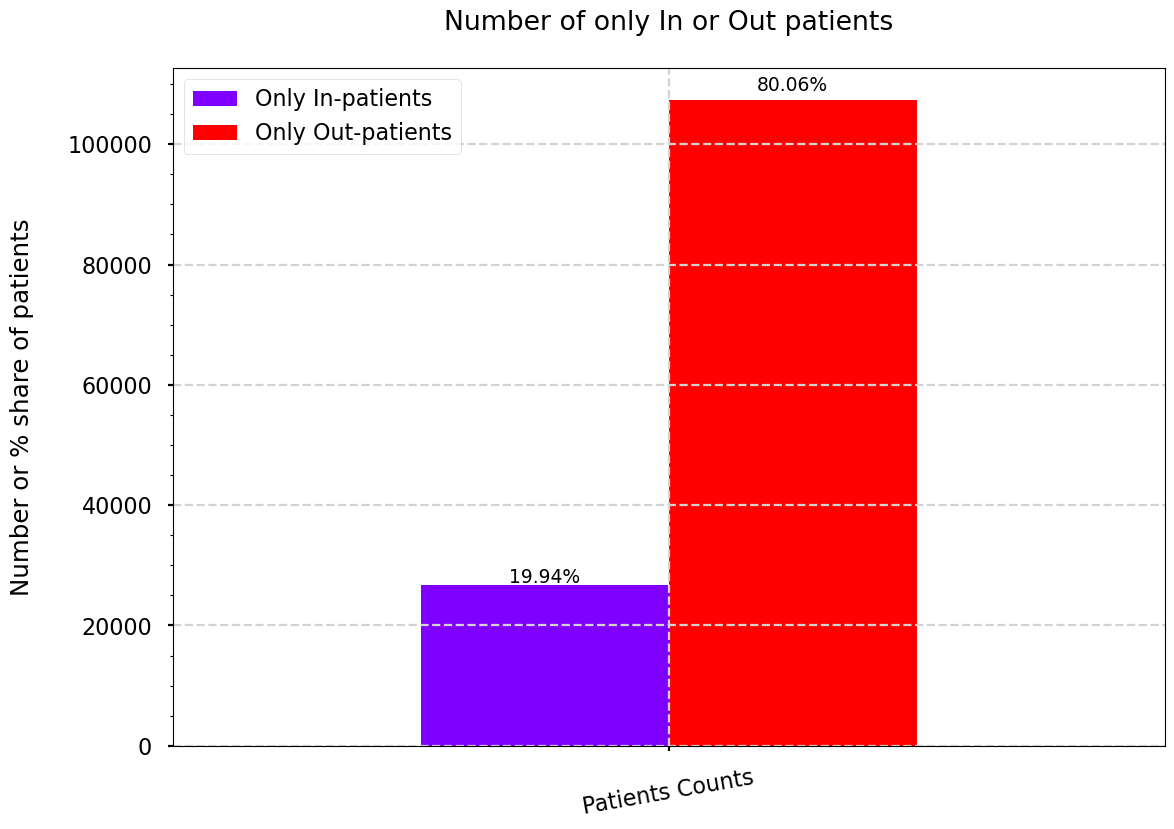

In [19]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    fig = patients_counts.plot(kind='bar',colormap='rainbow')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_patients,2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xticks(labels=["Patients Counts"], ticks=[0], rotation=10)
    plt.ylabel("Number or % share of patients\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Number of only In or Out patients\n")
    plt.plot();

OBSERVATION

From the above plot, we can decude that 80% of the patients gets medicared without even admission.

#### Exploring Inpatient Records

NULL records in the in-patients data

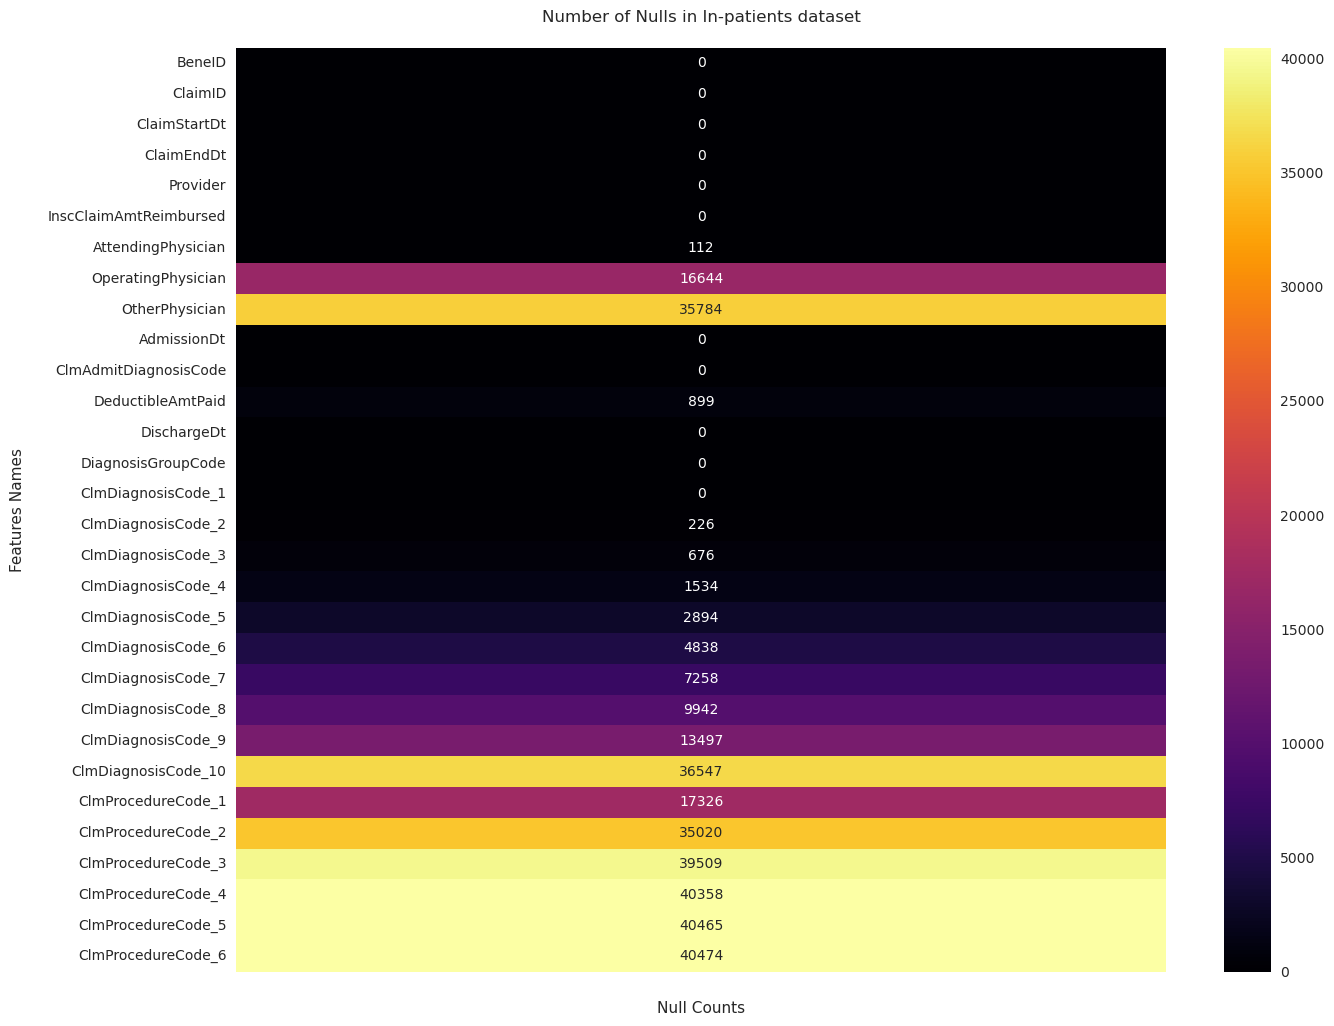

In [20]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_ip_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts")
    plt.ylabel("Features Names\n")
    plt.minorticks_on()
    plt.title("Number of Nulls in In-patients dataset\n")
    plt.plot();

OBSERVATION

From the above plot, we can see that the majority of the ProcedureCodes are having NULLS. And, ClmDiagnosisCode_10 is very rare among Patients.

Added Flag for indicating whether beneficiary admitted or not?

In [21]:
train_ip_df['Admitted?'] =1

In [22]:
# Added Claim_Clearance_Days
train_ip_df['ClaimStartDt'] = pd.to_datetime(train_ip_df['ClaimStartDt'], format="%Y-%m-%d")
train_ip_df['ClaimEndDt'] = pd.to_datetime(train_ip_df['ClaimEndDt'], format="%Y-%m-%d")
train_ip_df['Claim_Duration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days
train_ip_df['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

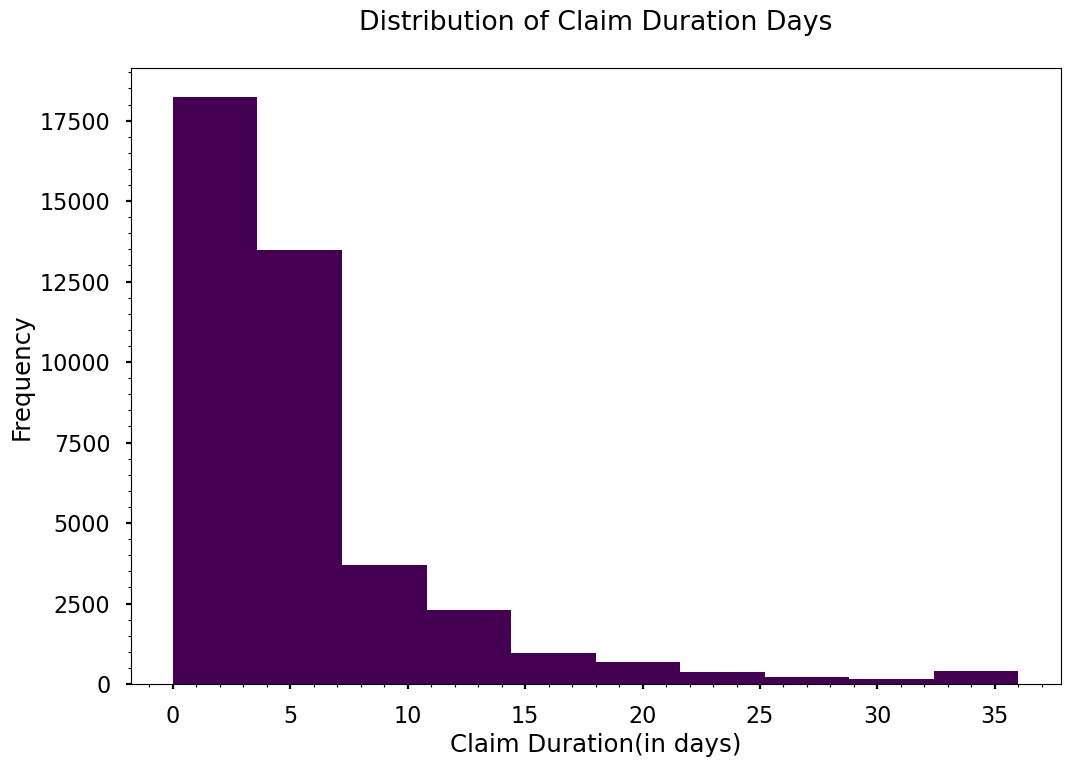

In [23]:

# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_ip_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

OBSERVATION

From the above plot, we can decude that the majority of the claims filed for less than 7 days.

In [24]:
# Percentiles values
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_ip_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 1.0
Percentile --> 20.0 and its value is --> 2.0
Percentile --> 25.0 and its value is --> 2.0
Percentile --> 30.0 and its value is --> 3.0
Percentile --> 40.0 and its value is --> 3.0
Percentile --> 50.0 and its value is --> 4.0
Percentile --> 60.0 and its value is --> 5.0
Percentile --> 70.0 and its value is --> 6.0
Percentile --> 75.0 and its value is --> 7.0
Percentile --> 80.0 and its value is --> 8.0
Percentile --> 90.0 and its value is --> 12.0
Percentile --> 91.0 and its value is --> 13.0
Percentile --> 92.0 and its value is --> 14.0
Percentile --> 93.0 and its value is --> 14.0
Percentile --> 94.0 and its value is --> 15.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 18.0
Percentile --> 97.0 and its value is --> 21.0
Percentile --> 98.0 and its value is --> 25.0
Percentile --> 99.0 and its value is --> 32.0
Percentile --> 99.9 and its value is --> 35.0
Percentile --> 99.99 and its value is --> 35

OBSERVATION

From the results, we can say that 95% of the claims are filed for 17 days.

##### Q1. What is the relationship b/w Amount of Insurance Claim Reimbursed v/s Claim Clearance Days?

In [25]:
unq_claim_duration_days = train_ip_df['Claim_Duration'].unique()
unq_claim_duration_days

array([ 6,  2,  3,  8, 17,  5,  4,  7,  1, 11, 35,  9, 15, 12, 24, 23, 14,
        0, 10, 13, 18, 19, 28, 16, 21, 26, 22, 32, 27, 20, 31, 25, 34, 30,
       29, 33, 36], dtype=int64)

In [26]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['BeneID'].count())
tot_claims_filed_for_specific_days


,BeneID
Claim_Duration,
0,605
1,4599
2,6119
3,6899
4,4993
5,3579
6,2714
7,2210
8,1612


In [27]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_ip_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations

,InscClaimAmtReimbursed
Claim_Duration,
0,3925000
1,33356000
2,43987610
3,56477460
4,43932690
5,33962440
6,29057610
7,25537200
8,20637600


In [28]:
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount
0,0,605,3925000
1,1,4599,33356000
2,2,6119,43987610
3,3,6899,56477460
4,4,4993,43932690


In [29]:
claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)

In [30]:
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,605,3925000,6487.60
1,1,4599,33356000,7252.88
2,2,6119,43987610,7188.69
3,3,6899,56477460,8186.33
4,4,4993,43932690,8798.86


C:\Users\Sheriff\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.313

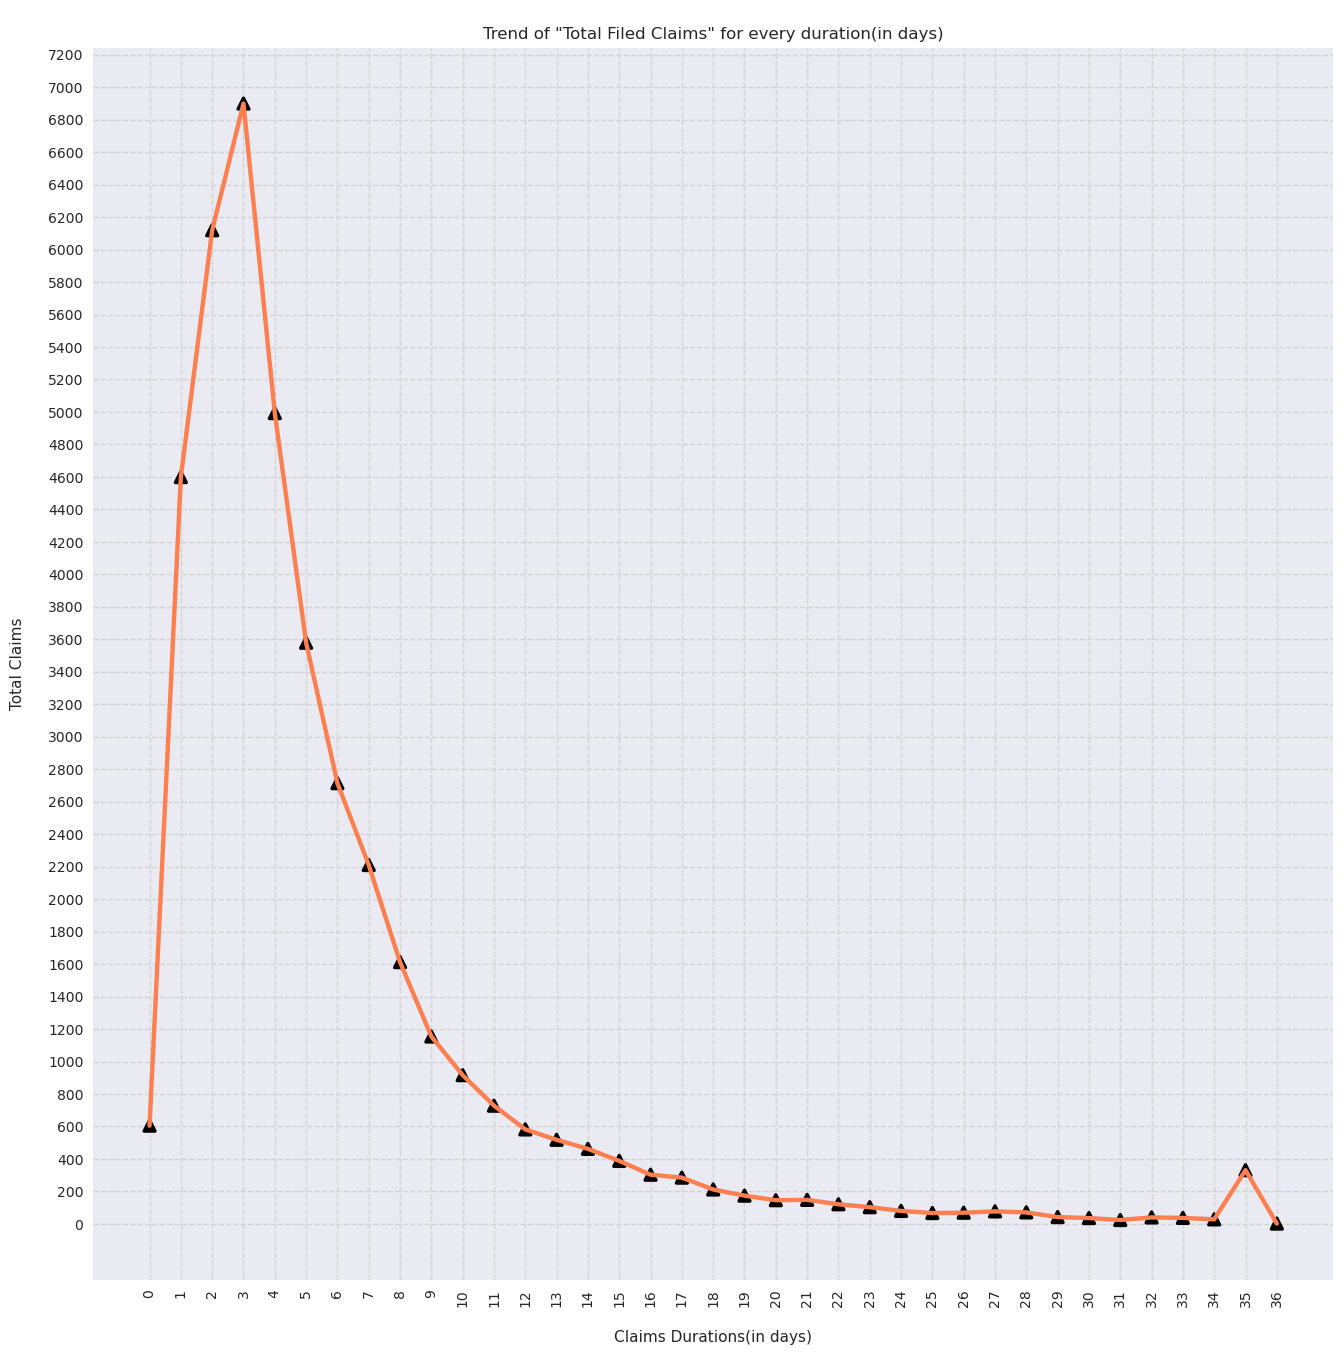

In [31]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,16))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='k', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', 
                  color='coral', markers="", linestyles="-")
     
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations(in days)")
    plt.ylabel("Total Claims\n")
    plt.yticks(np.arange(0,7500,200))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Filed Claims" for every duration(in days)')
    plt.plot();

OBSERVATION

The above graph tells us that the most number of claims are filed for 3 days. And, there are very less number of claims for duration greater than 15.

However, we can witness a litter spike for 35 days of duration for claims.
And, there are around 600 claims for which the duration is 0 that means Claim Start Date and End Date is same.

C:\Users\Sheriff\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.313

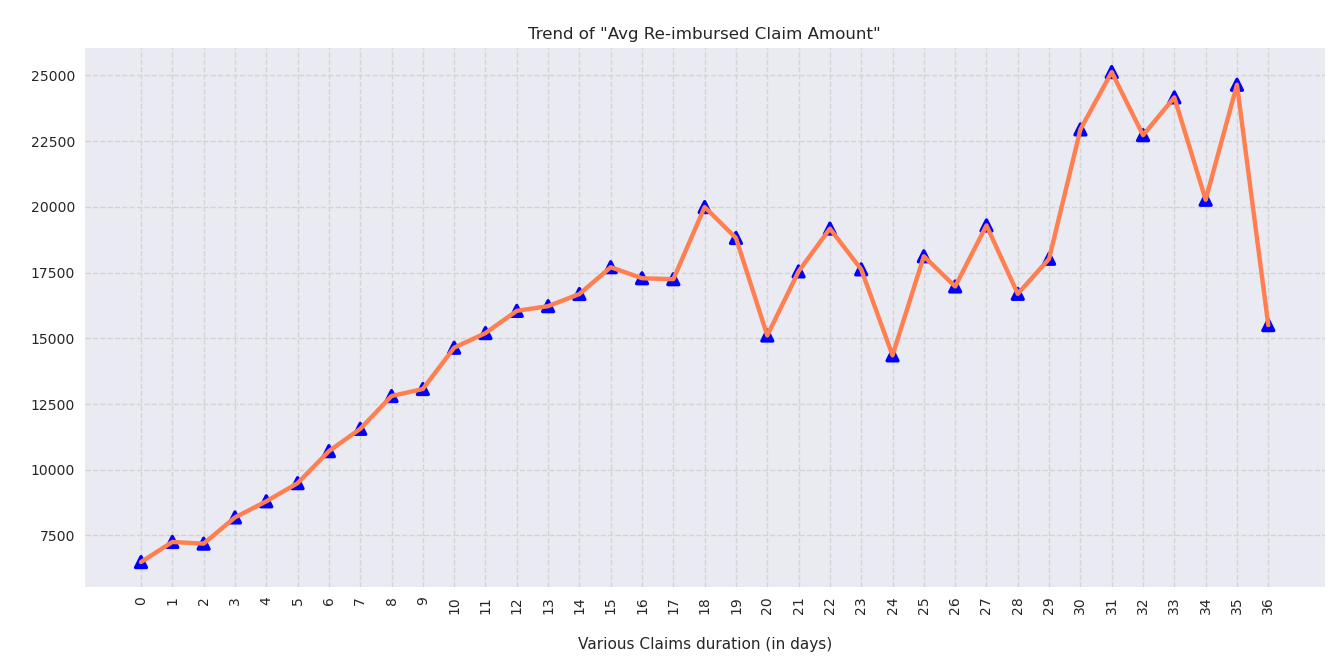

In [32]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"')
    plt.plot();

OBSERVATION

The above graph tells us that as the claim duration increases then the Avg Re-imbursed Amount also increases, however, as we have already seen that total number of claims are very less when duration is greater than 15 days.

Another thing to look here is that if the duration is b/w [30-35] then the Average Re-imbursed amount is very high and reaches its maximum.

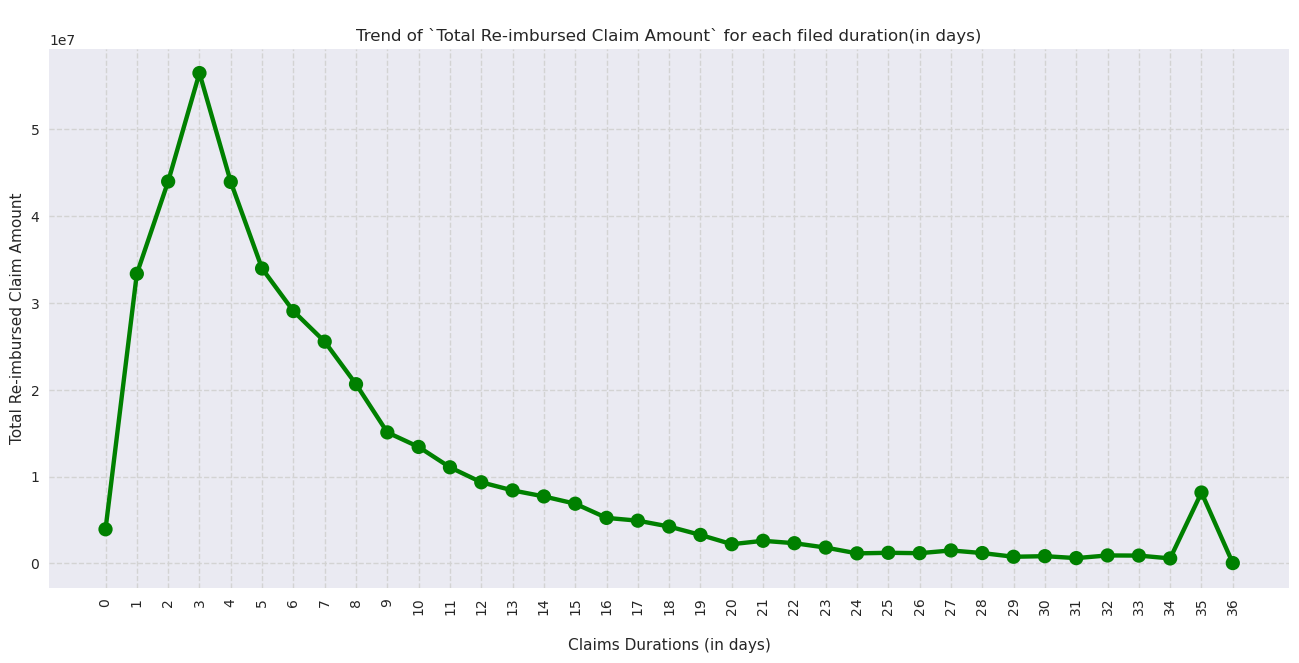

In [33]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)")
    plt.ylabel("Total Re-imbursed Claim Amount")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)")
    plt.plot();


OBSERVATION

The above graph tells us that the Total Re-imbursed Amount is the highest for 3 days claims

And, for claims with durations from 12 to 34 the total re-imbursed amount is very less, however, for 35 days duration we can witness a clear spike that can be a potential sign of fraudulent.

##### Q2. What is the relationship b/w Claimed and Admitted Durations with Re-imbursed Amount?

In [34]:
train_ip_df['DischargeDt'] = pd.to_datetime(train_ip_df['DischargeDt'], format="%Y-%m-%d")
train_ip_df['AdmissionDt'] = pd.to_datetime(train_ip_df['AdmissionDt'], format="%Y-%m-%d")
train_ip_df['Admitted_Days'] = train_ip_df['DischargeDt'] - train_ip_df['AdmissionDt']
train_ip_df['Admitted_Days'] = train_ip_df['Admitted_Days'].dt.days

In [35]:
claims_with_diff_admitted_and_claimed_dur = train_ip_df[~(train_ip_df['Claim_Duration'] == train_ip_df['Admitted_Days'])]
claims_with_diff_admitted_and_claimed_dur

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,1,9,6
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,3
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,1,11,9
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,8
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,5
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,...,40390,8411.0,NaN,NaN,NaN,NaN,NaN,1,1,6
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,...,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,1,7,11
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,27801,3712.0,NaN,NaN,NaN,NaN,NaN,1,8,5
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,...,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,1,2,6
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,12


In [36]:
claims_with_diff_admitted_and_claimed_dur['InscClaimAmtReimbursed'].sum()

671400

OBSERVATION

The above table tells us that there are 49 claims whose Claimed Duration and Admitted Duration are different.

And, for these 49 claims the total re-imbursed amount is around 0.67 Million. So, doesn't look like an issue here as the admitted days can be greater than claimed duration based upon the plan bought by the beneficiary.

In [37]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?,Claim_Duration,Admitted_Days
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,1,9,6
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,2008-12-31,...,NaN,5369.0,NaN,NaN,NaN,NaN,NaN,1,11,9
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,2009-02-18,...,27801,3712.0,NaN,NaN,NaN,NaN,NaN,1,8,5
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,2009-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,7
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,2009-05-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,5
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,2009-02-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11,8
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,2009-01-02,...,NaN,387.0,NaN,NaN,NaN,NaN,NaN,1,3,1
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,2009-02-23,...,NaN,54.0,NaN,NaN,NaN,NaN,NaN,1,5,2
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,2009-01-01,...,486,5123.0,7850.0,NaN,NaN,NaN,NaN,1,21,18
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,2009-02-09,...,NaN,3950.0,NaN,NaN,NaN,NaN,NaN,1,36,35


In [38]:
claims_with_diff_admitted_and_claimed_dur[claims_with_diff_admitted_and_claimed_dur['Claim_Duration']  > \
                                          claims_with_diff_admitted_and_claimed_dur['Admitted_Days']]['InscClaimAmtReimbursed'].sum()

274000

OBSERVATION

The above table tells us that 17 claims out of 49 have Claimed Duration greater than the Admitted Duration.

And, for these 17 claims the total re-imbursed amount is around 0.27 Million. For now, I'll keep this feature but my initial look says that it won't be much of a use.

##### Q3. What is the relationship b/w DeductibleAmtPaid and Re-imbursed Amount?

In [39]:
no_of_claim_with_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
print('no of claim wit no copay',no_of_claim_with_no_copay)
# 899
no_of_claim_with_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()].shape[0]
print('no. of claim with copay',no_of_claim_with_copay)
# 39575
percent_of_no_copay_claims = round((no_of_claim_with_no_copay / (no_of_claim_with_copay + no_of_claim_with_no_copay)) * 100,1)
print("### Percentage of claims with no co-payment or deductible --> {}% ###".format(percent_of_no_copay_claims))
### Percentage of claims with no co-payment or deductible --> 2.2% ###
re_imbursed_amt_for_no_copay = train_ip_df[train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_for_no_copay
# 10690000
re_imbursed_amt_with_some_copay = train_ip_df[~train_ip_df['DeductibleAmtPaid'].isna()]['InscClaimAmtReimbursed'].sum()
re_imbursed_amt_with_some_copay
# 397607020
tot_sum_of_claims_with_copay = re_imbursed_amt_with_some_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
tot_sum_of_claims_with_no_copay = re_imbursed_amt_for_no_copay / (re_imbursed_amt_with_some_copay + re_imbursed_amt_for_no_copay)
percent_of_tot_sum_no_copay_claims_amt = round(tot_sum_of_claims_with_no_copay * 100,1)
print("### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> {}% ###".\
      format(percent_of_tot_sum_no_copay_claims_amt))
### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 2.6% ###

no of claim wit no copay 899
no. of claim with copay 39575
### Percentage of claims with no co-payment or deductible --> 2.2% ###
### Percentage of Total Re-imbursed Amount for claims with no co-payment or deductible --> 2.6% ###


OBSERVATION

The above table tells us that there are a 2% of total claims for which there is no co-payment.
And, for these 2% (or 899) of total claims the total re-imbursed amount is 10.6 Million that is 2.6% of the total re-imbursed amount.

In [40]:
# Here, updating the NULL values of DeductibleAmtPaid feature as 0
train_ip_df['DeductibleAmtPaid'].fillna(value=0.0, inplace=True)

##### Q4. What is the relationship of Providers with Total number of claims filed & Re-imbursed Amount?

In [41]:
provider_tot_claims_filed = pd.DataFrame(train_ip_df.groupby(['Provider'])['ClaimID'].count())
provider_tot_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].sum())

prv_tot_filed_claims_and_tot_reimb_amt = pd.merge(left=provider_tot_claims_filed, right=provider_tot_reimbursed_amt, how='inner',
                                                  left_on=provider_tot_claims_filed.index, right_on=provider_tot_reimbursed_amt.index)

prv_tot_filed_claims_and_tot_reimb_amt.columns = ['ProviderID', 'Tot_Claims_Filed', 'Tot_Re_Imbursed_Amt']
prv_tot_filed_claims_and_tot_reimb_amt.reset_index(drop=True,inplace=True)
prv_tot_filed_claims_and_tot_reimb_amt['Percentage_out_of_tot_reimb_amt'] = round((prv_tot_filed_claims_and_tot_reimb_amt['Tot_Re_Imbursed_Amt'] / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100, 3)

provider_max_reimbursed_amt = pd.DataFrame(train_ip_df.groupby(['Provider'])['InscClaimAmtReimbursed'].max())
provider_max_reimbursed_amt.rename(columns={"InscClaimAmtReimbursed": "Max_Re_Imbursed_Amt"}, inplace=True)

prv_tot_filed_claims_tot_max_reimb_amt = pd.merge(left=prv_tot_filed_claims_and_tot_reimb_amt, 
                                                  right=provider_max_reimbursed_amt, how='inner',
                                                  left_on=prv_tot_filed_claims_and_tot_reimb_amt['ProviderID'], 
                                                  right_on=provider_max_reimbursed_amt.index)

prv_tot_filed_claims_tot_max_reimb_amt.drop(['key_0'], axis=1, inplace=True)
prv_tot_filed_claims_tot_max_reimb_amt['Diff_in_Tot_and_Max'] = prv_tot_filed_claims_tot_max_reimb_amt['Tot_Re_Imbursed_Amt'] - \
prv_tot_filed_claims_tot_max_reimb_amt['Max_Re_Imbursed_Amt']

prv_tot_filed_claims_tot_max_reimb_amt.head()

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
0,PRV51001,5,97000,0.024,42000,55000
1,PRV51003,62,573000,0.140,57000,516000
2,PRV51007,3,19000,0.005,10000,9000
3,PRV51008,2,25000,0.006,21000,4000
4,PRV51011,1,5000,0.001,5000,0


In [42]:
prv_tot_filed_claims_tot_max_reimb_amt.sort_values(by=['Diff_in_Tot_and_Max','Max_Re_Imbursed_Amt','Percentage_out_of_tot_reimb_amt'],
                                                   axis=0, inplace=True,
                                                   ascending=[True, False, False])
prv_tot_filed_claims_tot_max_reimb_amt.head(60)

,ProviderID,Tot_Claims_Filed,Tot_Re_Imbursed_Amt,Percentage_out_of_tot_reimb_amt,Max_Re_Imbursed_Amt,Diff_in_Tot_and_Max
574,PRV52518,1,57000,0.014,57000,0
578,PRV52537,1,57000,0.014,57000,0
1767,PRV56664,1,57000,0.014,57000,0
1883,PRV57080,1,57000,0.014,57000,0
2012,PRV57399,1,57000,0.014,57000,0
1970,PRV57290,2,55000,0.013,55000,0
305,PRV51681,1,51000,0.012,51000,0
637,PRV52804,1,36000,0.009,36000,0
286,PRV51626,1,35000,0.009,35000,0
11,PRV51035,1,29000,0.007,29000,0


OBSERVATION

The above table showing us the Provider Ids who only filed 1 or 2 claims and got the entire amount re-imbursed.
This, can be a potential sign of fraudulent because many small-small hospitals in rural area who don't have much facilities or equipments made fraud for benefits. Similar recently happened : refer here https://www.justice.gov/opa/pr/two-individuals-convicted-14-billion-health-care-fraud-scheme-involving-rural-hospitals

In [43]:
tot_re_imb_amt_for_prv_with_5orless_claims = prv_tot_filed_claims_tot_max_reimb_amt[prv_tot_filed_claims_tot_max_reimb_amt['Tot_Claims_Filed'] < 5] \
                                            ['Tot_Re_Imbursed_Amt'].sum()

pp_re_imb_amt_for_prv_with_5orless_claims = round((tot_re_imb_amt_for_prv_with_5orless_claims / train_ip_df['InscClaimAmtReimbursed'].sum()) * 100,2)
print("### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> {} (17 Million). ###\n\
### And, this is {}% of Total Re-imbursed Claim Amount (408 Million). ###".format(tot_re_imb_amt_for_prv_with_5orless_claims, 
                                                                    pp_re_imb_amt_for_prv_with_5orless_claims))

### Total Re-imbursed Amount for Providers with less than 5 filed claims is --> 17012550 (17 Million). ###
### And, this is 4.17% of Total Re-imbursed Claim Amount (408 Million). ###


#### Exploring the Out-patients Data

In [44]:
train_op_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


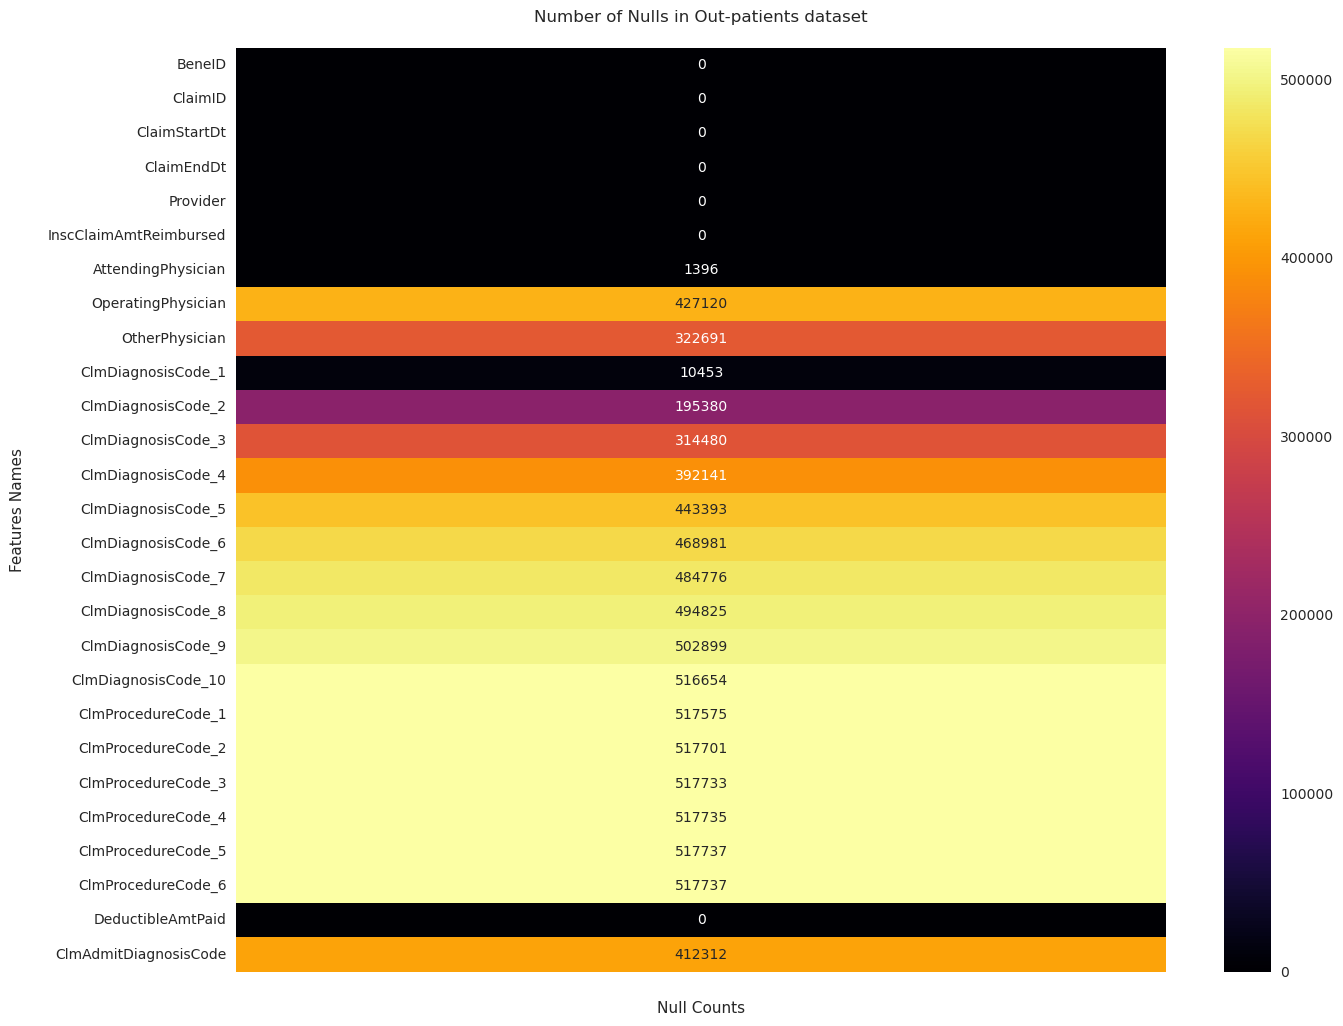

In [45]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_op_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts")
    plt.ylabel("Features Names\n")
    plt.minorticks_on()
    plt.title("Number of Nulls in Out-patients dataset\n")
    plt.plot();

OBSERVATION

From the above plot, we can say that the majority of the ProcedureCodes are having NULLS.

ClmDiagnosisCode_9 & ClmDiagnosisCode_10 are very rare among Patients.

In [46]:
# Added Flag for indicating whether beneficiary admitted or not?
train_op_df["Admitted?"] = 0

Added Claim_Clearance_Days

In [47]:
train_op_df['ClaimStartDt'] = pd.to_datetime(train_op_df['ClaimStartDt'], format="%Y-%m-%d")
train_op_df['ClaimEndDt'] = pd.to_datetime(train_op_df['ClaimEndDt'], format="%Y-%m-%d")
train_op_df['Claim_Duration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days
train_op_df['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

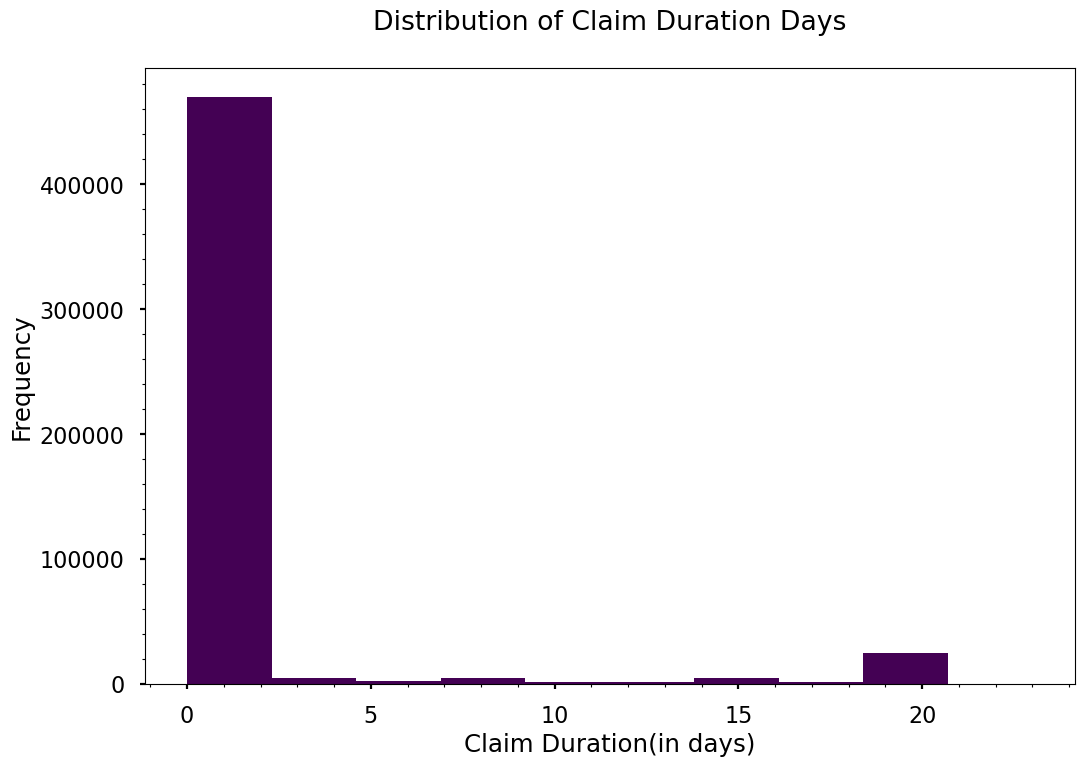

In [48]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_op_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)")
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n")
    plt.plot();

OBSERVATION

From the above plot, we can decude that the majority of the claims filed for less than or equals to 2 days.

In [49]:
# Percentiles values
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 0.0
Percentile --> 20.0 and its value is --> 0.0
Percentile --> 25.0 and its value is --> 0.0
Percentile --> 30.0 and its value is --> 0.0
Percentile --> 40.0 and its value is --> 0.0
Percentile --> 50.0 and its value is --> 0.0
Percentile --> 60.0 and its value is --> 0.0
Percentile --> 70.0 and its value is --> 0.0
Percentile --> 75.0 and its value is --> 0.0
Percentile --> 80.0 and its value is --> 0.0
Percentile --> 90.0 and its value is --> 2.0
Percentile --> 91.0 and its value is --> 3.0
Percentile --> 92.0 and its value is --> 6.0
Percentile --> 93.0 and its value is --> 9.0
Percentile --> 94.0 and its value is --> 14.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 20.0
Percentile --> 97.0 and its value is --> 20.0
Percentile --> 98.0 and its value is --> 20.0
Percentile --> 99.0 and its value is --> 20.0
Percentile --> 99.9 and its value is --> 20.0
Percentile --> 99.99 and its value is --> 20.0
P

OBSERVATION

From the results, we can say that 90% of the claims are filed for 2 days.

Q5. What is the relationship b/w Claim Duration and Re-imbursed Amount?

C:\Users\Sheriff\AppData\Local\Temp\ipykernel_17204\1622349236.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_op_df, palette="plasma")


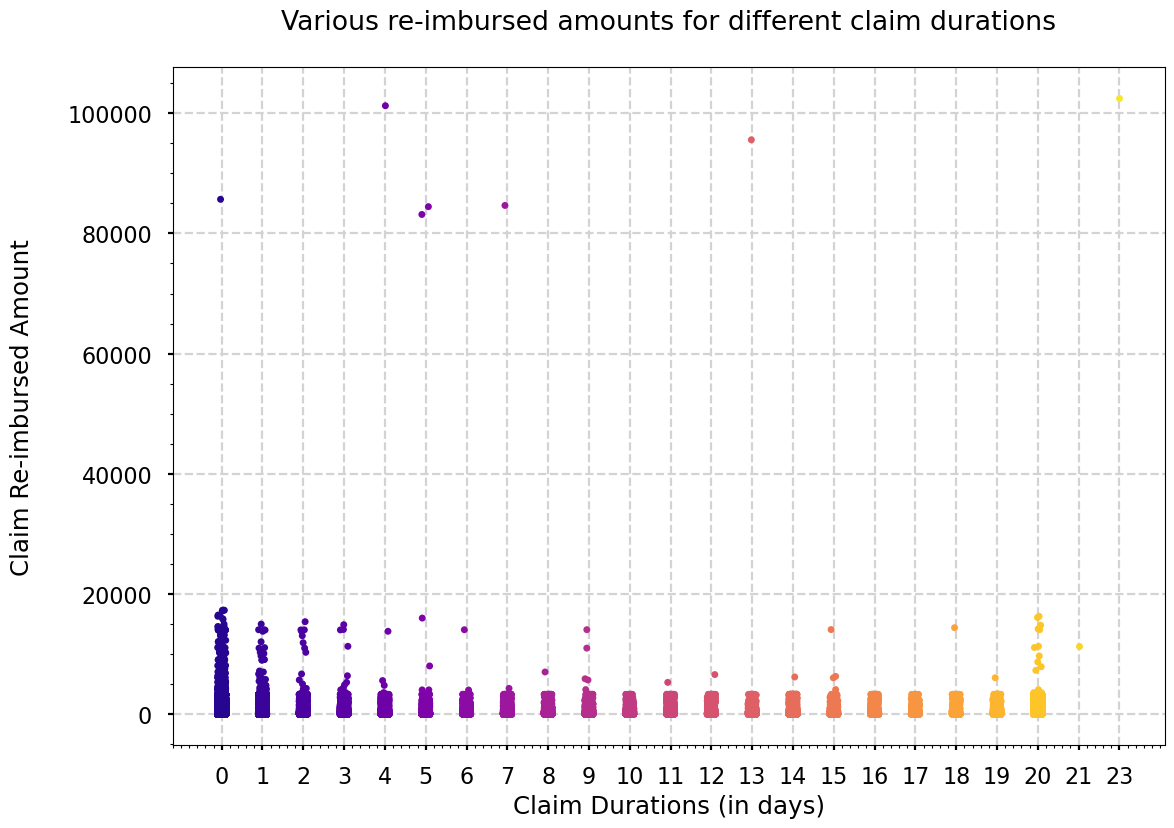

In [50]:
with plt.style.context("seaborn-poster"):
    sns.stripplot(x="Claim_Duration", y="InscClaimAmtReimbursed", data=train_op_df, palette="plasma")
    # Providing the labels and title to the graph
    plt.xlabel("Claim Durations (in days)")
    plt.ylabel("Claim Re-imbursed Amount\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Various re-imbursed amounts for different claim durations\n")
    plt.plot();

OBSERVATION

From the above plot, we can decude that the majority of the claims filed have re-imbursed amount less than 20,000. And, very few have more than 1,00,000.

In [51]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["InscClaimAmtReimbursed"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 10.0
Percentile --> 20.0 and its value is --> 30.0
Percentile --> 25.0 and its value is --> 40.0
Percentile --> 30.0 and its value is --> 40.0
Percentile --> 40.0 and its value is --> 60.0
Percentile --> 50.0 and its value is --> 80.0
Percentile --> 60.0 and its value is --> 100.0
Percentile --> 70.0 and its value is --> 200.0
Percentile --> 75.0 and its value is --> 200.0
Percentile --> 80.0 and its value is --> 300.0
Percentile --> 90.0 and its value is --> 700.0
Percentile --> 91.0 and its value is --> 800.0
Percentile --> 92.0 and its value is --> 900.0
Percentile --> 93.0 and its value is --> 1000.0
Percentile --> 94.0 and its value is --> 1200.0
Percentile --> 95.0 and its value is --> 1500.0
Percentile --> 96.0 and its value is --> 1800.0
Percentile --> 97.0 and its value is --> 2100.0
Percentile --> 98.0 and its value is --> 2500.0
Percentile --> 99.0 and its value is --> 3300.0
Percentile --> 99.9 and its value is --> 3500.0
Percentile 

99.9% of claims have Re-imbursed amount less than 3500.

In [52]:
tot_claims_filed_for_specific_days = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['ClaimID'].count())
tot_claims_filed_for_specific_daystot_claims_filed_for_specific_days = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['ClaimID'].count())
tot_claims_filed_for_specific_days

,ClaimID
Claim_Duration,
0,453348
1,11960
2,4366
3,2597
4,2238
5,1511
6,1306
7,2564
8,1189


In [53]:
tot_insc_amount_for_claim_durations = pd.DataFrame(train_op_df.groupby(['Claim_Duration'])['InscClaimAmtReimbursed'].sum())
tot_insc_amount_for_claim_durations
claim_clearance_amts = pd.merge(left=tot_claims_filed_for_specific_days, right=tot_insc_amount_for_claim_durations,
                                how='inner',
                                left_on=tot_claims_filed_for_specific_days.index,
                                right_on=tot_insc_amount_for_claim_durations.index)

claim_clearance_amts.columns = ['Claim_durations_in_days', 'Total_claims', 'All_Claims_Total_Amount']
claim_clearance_amts.head()

claim_clearance_amts['Avg_Claim_Insc_Amount'] = np.round(claim_clearance_amts['All_Claims_Total_Amount']/claim_clearance_amts['Total_claims'],2)
claim_clearance_amts.head()

,Claim_durations_in_days,Total_claims,All_Claims_Total_Amount,Avg_Claim_Insc_Amount
0,0,453348,105624910,232.99
1,1,11960,5381060,449.92
2,2,4366,2227230,510.13
3,3,2597,1272800,490.10
4,4,2238,1270910,567.88


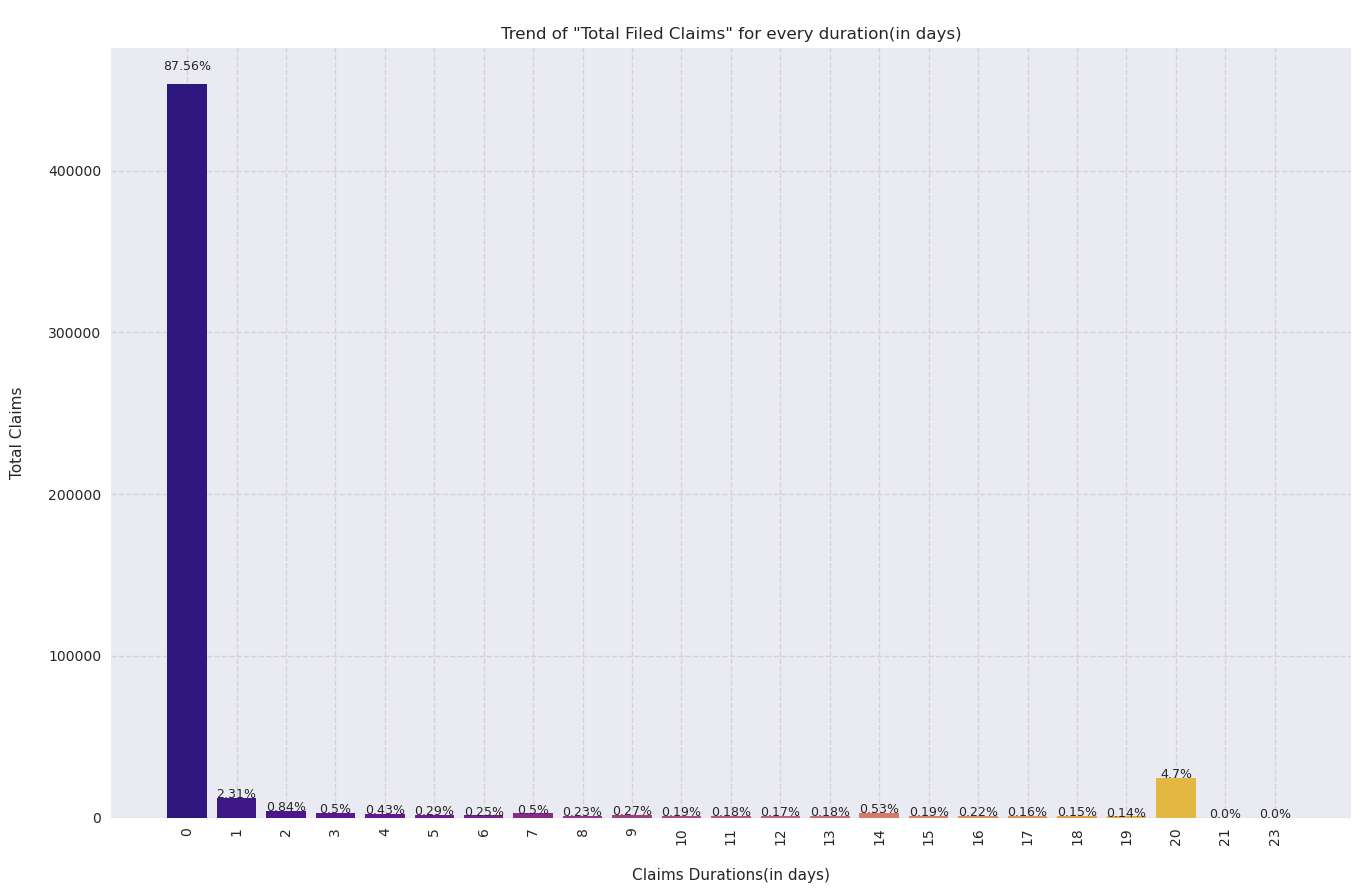

In [54]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    fig = sns.barplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Total_claims', palette='plasma')     
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/claim_clearance_amts["Total_claims"].sum(),2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=9, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations(in days)")
    plt.ylabel("Total Claims\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Total Filed Claims" for every duration(in days)')
    plt.plot();

OBSERVATION

The above graph tells us that the most number of claims are filed for 0 days. And, there are very less number of claims for other durations.
However, we can witness a litter spike for 20 days of duration for claims.

C:\Users\Sheriff\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.313

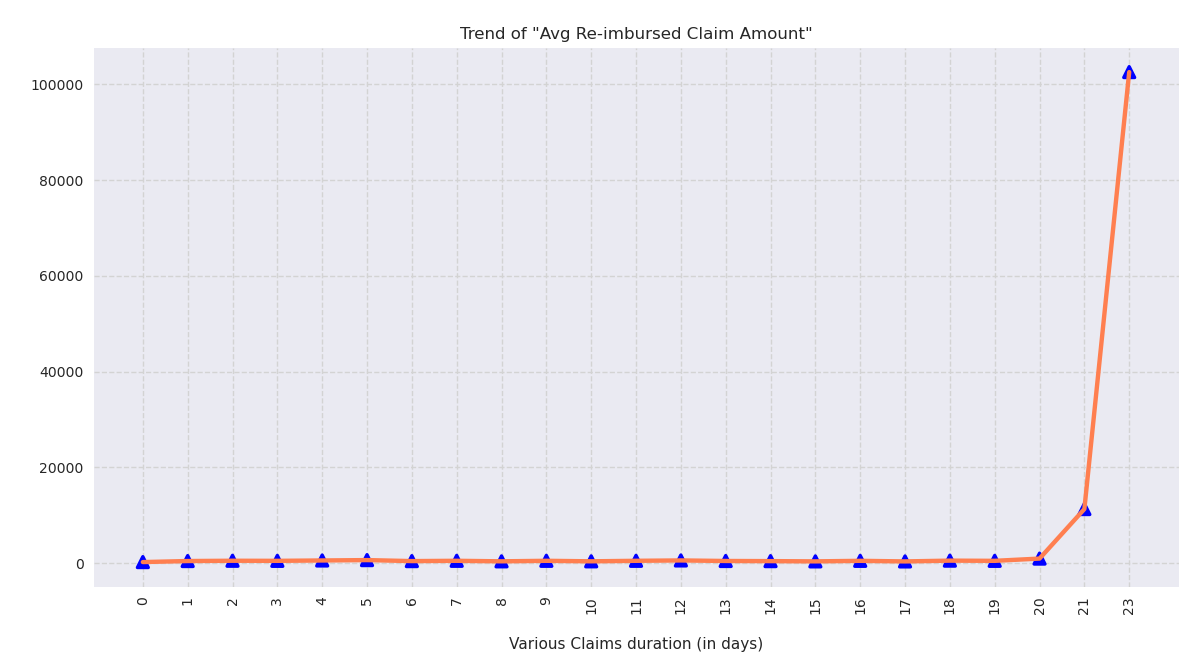

In [55]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)")
    plt.ylabel(" ")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"')
    plt.plot();

OBSERVATIONm

The above graph tells us that the Average Re-imbursed Amount is same throughout the various durations except for 21 and 23 days.

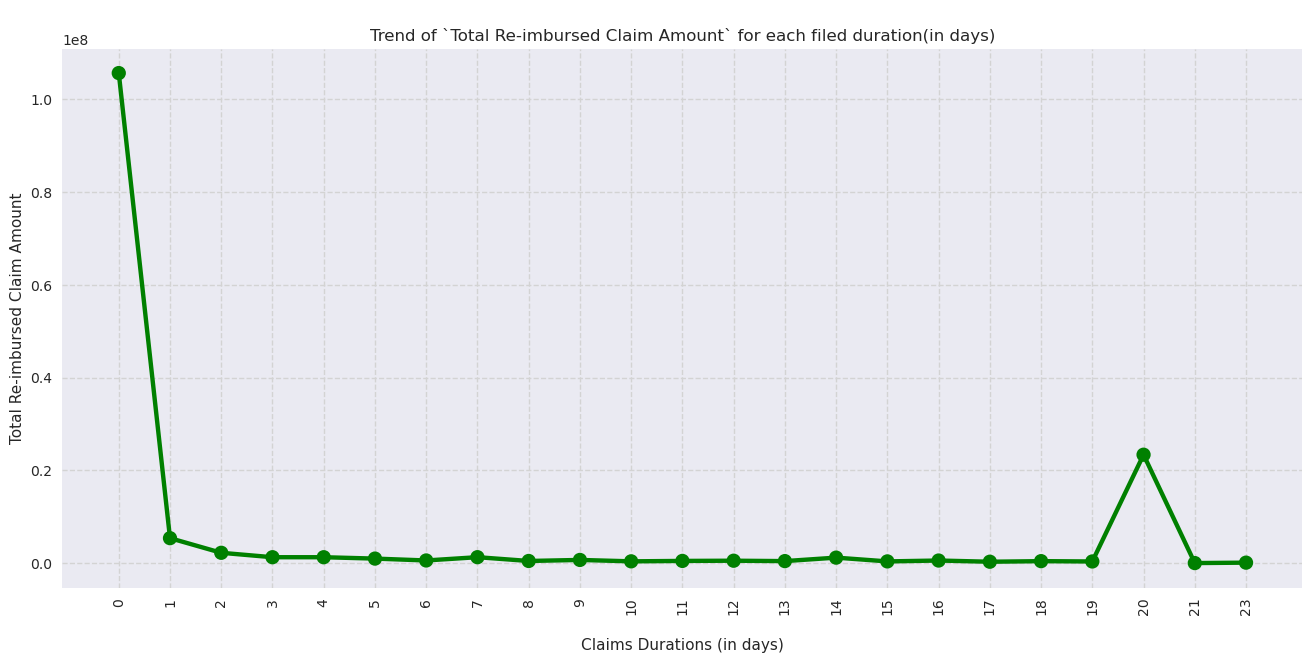

In [56]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)")
    plt.ylabel("Total Re-imbursed Claim Amount")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)")
    plt.plot();

OBSERVATION

The above graph tells us that the Total Re-imbursed Amount is the highest for 0 days claims.

And, for claims with durations from 2 to 19 the total re-imbursed amount is very less or similar, however, for 20 days duration we can witness a clear spike that can be a potential sign of fraudulent.

## IP & OP - EDA - SUMMARY
Features to be added:

Claim Duration

Admitted Duration

Admitted or not?

Relationships to be validated:

Providers <--> Physicians <--> Fraud or not?

Providers <--> Physicians <--> Diagnosis and Procedure Codes <--> Fraud or not?

Providers with very less number of claims submissions but higher Re-imbursed amount <--> Fraud or not?

### Entire Data EDA

In [57]:
train_ip_df = pd.read_csv('provider_healthcare/Train_Inpatientdata-1542865627584.csv')
train_op_df = pd.read_csv('provider_healthcare/Train_Outpatientdata-1542865627584.csv')
train_bene_df = pd.read_csv('provider_healthcare/Train_Beneficiarydata-1542865627584.csv')
train_tgt_lbls_df = pd.read_csv("provider_healthcare/Train-1542865627584.csv")

In [58]:
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [59]:
print("checking the number of fraud in train_tgt {}".format(train_tgt_lbls_df.shape[0]))

checking the number of fraud in train_tgt 5410


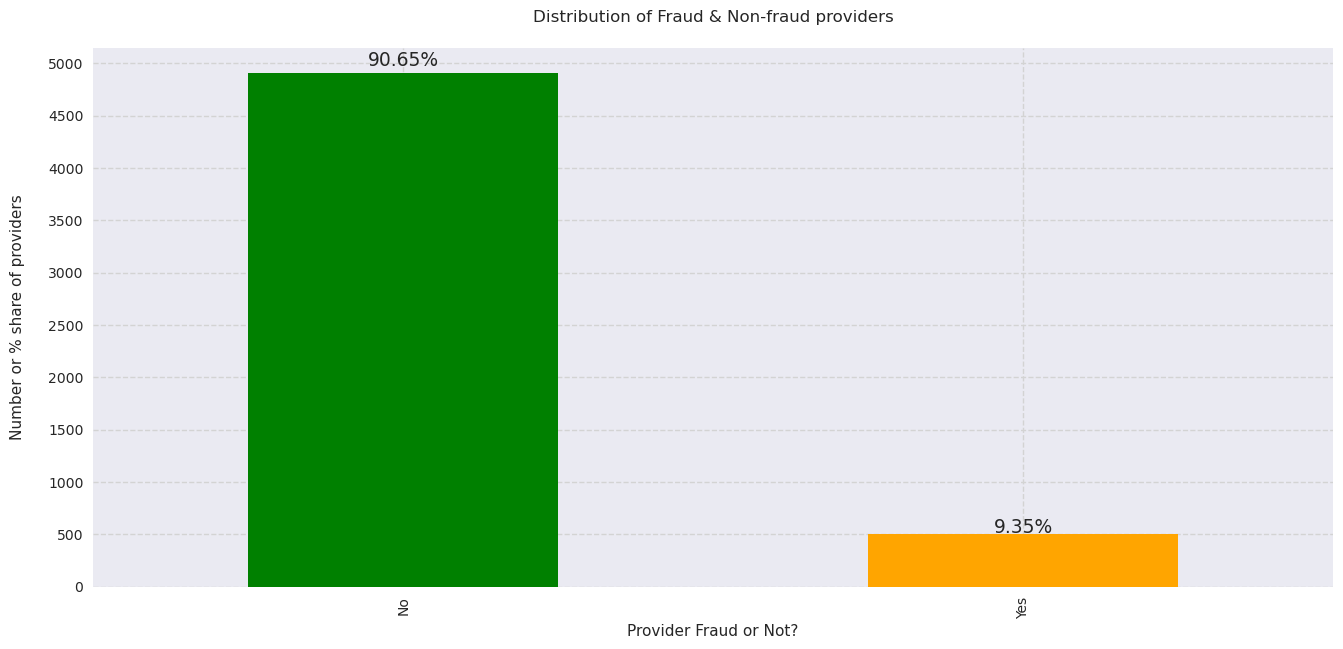

In [60]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind="bar",color=['green','orange'])
     # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?")
    plt.ylabel("Number or % share of providers\n")
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n" )
    plt.plot();


OBSERVATION

From the above plot, we can say that 90% of the providers are not frausters and only 9% of them are involved in frauds.

##### Adding the Admitted or Not Admitted indicator in IP and OP Dataset

Adding in IP Dataset

In [61]:
train_ip_df['Admitted?'] =1
train_op_df['Admitted?'] = 0

In [62]:
len(train_ip_df.columns)

31

In [63]:
len(train_op_df.columns)

28

##### Merging the Datasets

In [64]:
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [65]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [66]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [67]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

##### Entire Dataset

In [68]:
print(train_iobp_df.shape)
# (558211, 56)
# Unique Providers
train_iobp_df["Provider"].nunique()

(558211, 56)


5410

In [69]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

ASSUMPTION :: One provider may have been involved in more than one claim. So, does all the claims filed by a potentially fraud provider are all frauds?
- This cannot holds True for all the providers because if one provider has filed say 50 claims then we can't say that all the claims for that provider are fraudulent. 
    - There may exists a pattern that out of 50 claims a provider files 1 or 2 fraudulent claims. 

Therefore, it is a big assumption to make that all the claims filed by a potentially fraud provider are fraudulent.

In [70]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


OBSERVATION

As shown in the above table, PRV51005 has filed 1165 claims so after joining the datasets all of these will be marked as Fraud.

     PotentialFraud
No           345415
Yes          212796 



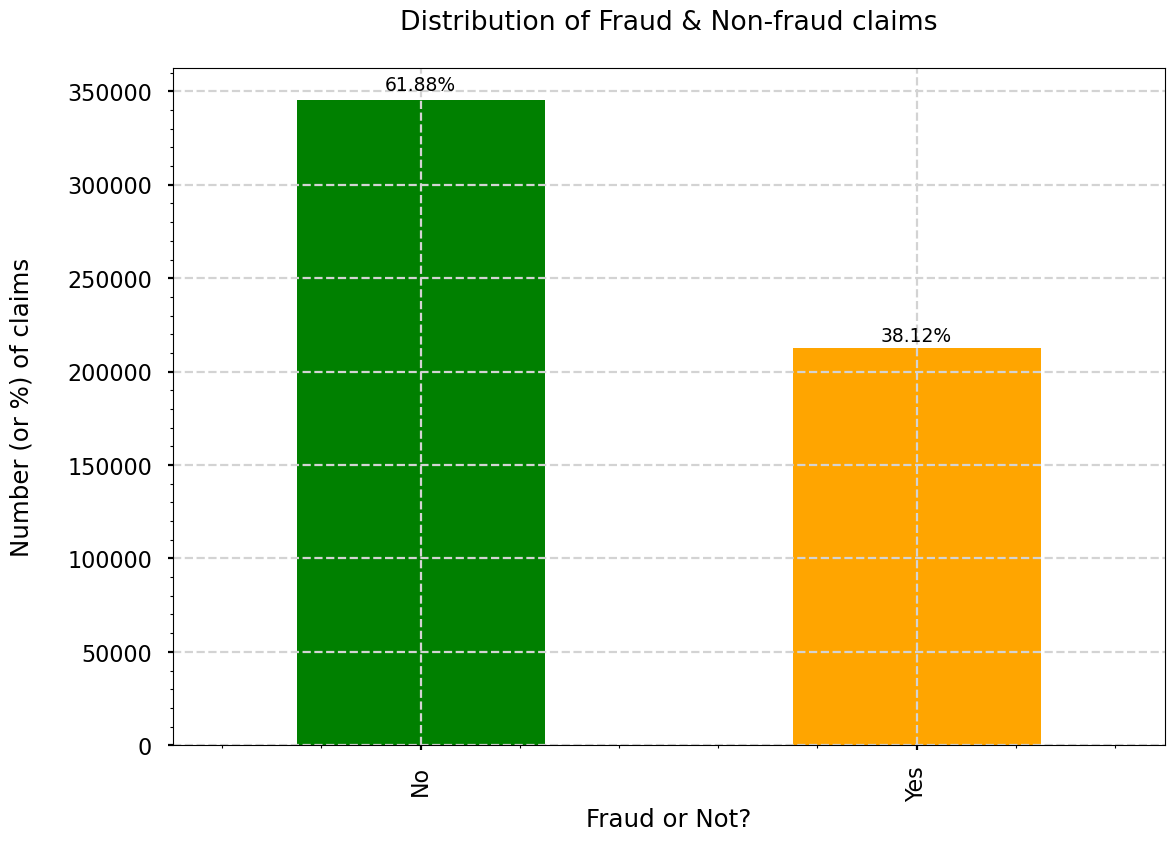

In [71]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?")
    plt.ylabel("Number (or %) of claims\n")
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n")
    plt.plot();

OBSERVATION

The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent.
By looking at the percentages we may say that there is a class-imbalance problem but after looking at the number of records it doesn't seem to be a severe class-imbalance problem.
So, I'll try some class balancing techniques only after training a baseline model w/o any synthetic or class weighting techniques.``

### Feature Engineering + Impact Analysis
Let's create some features

Adding New Feature :: Is_Alive?
- Is Alive? = No if DOD is NaN else Yes

In [72]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [73]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

In [74]:
# Adding New Feature :: Claim_Duration
# - Claim Duration = Claim End Date - Claim Start Date
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

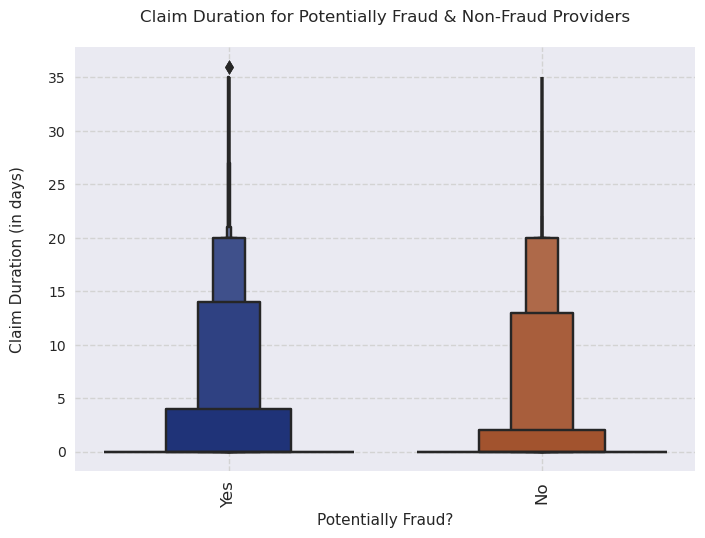

In [75]:

with plt.style.context('seaborn'):
    fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='Claim_Duration', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

OBSERVATION

The above plot clearly shows us that there is no difference in the distribution of Claim Duration for Potentially Fraud and Non-Fraud Providers.
Therefore, we can say that Claim Duration alone might not be useful in segregating the Fraud cases.
Relationship b/w Claim_Duration and Potentially Fraud for both the Genders

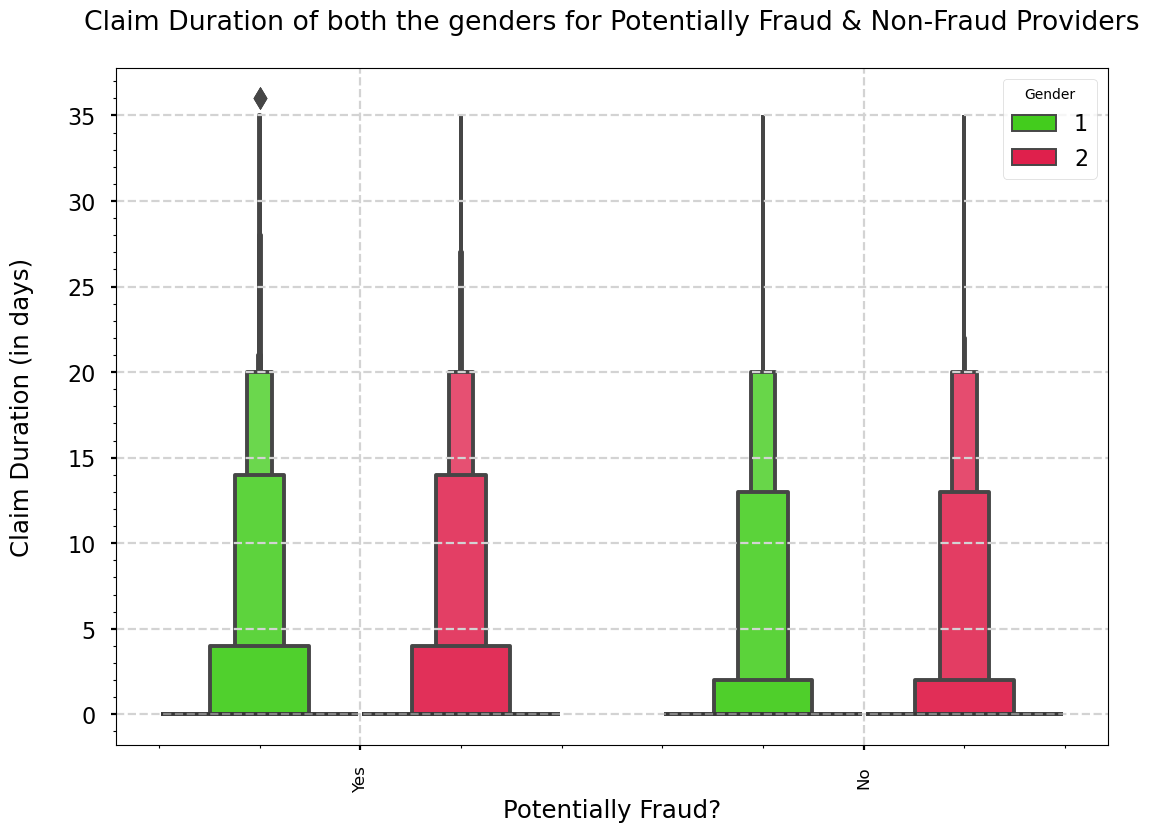

In [76]:

with plt.style.context('seaborn-poster'):
    fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='Claim_Duration', hue='Gender', palette='prism')      
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration of both the genders for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

BSERVATION

The above plot clearly shows us that there is no difference in the distribution of Claim Duration of males and females for Potentially Fraud and Non-Fraud Providers.
Therefore, we can say that Claim Duration might not be useful in segregating the Fraud cases.
Relationship b/w Claim_Duration and Potentially Fraud for Is_Alive?

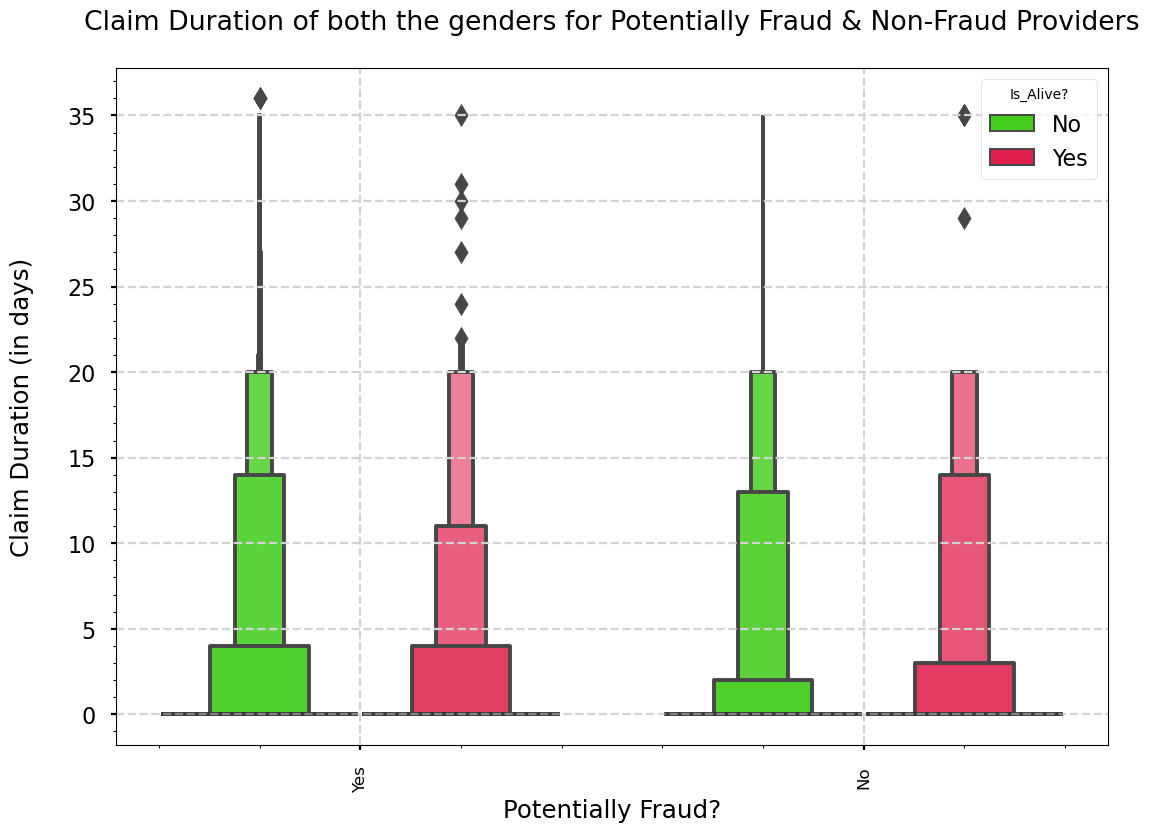

In [77]:

with plt.style.context('seaborn-poster'):
    fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='Claim_Duration', hue='Is_Alive?', palette='prism')      
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration of both the genders for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

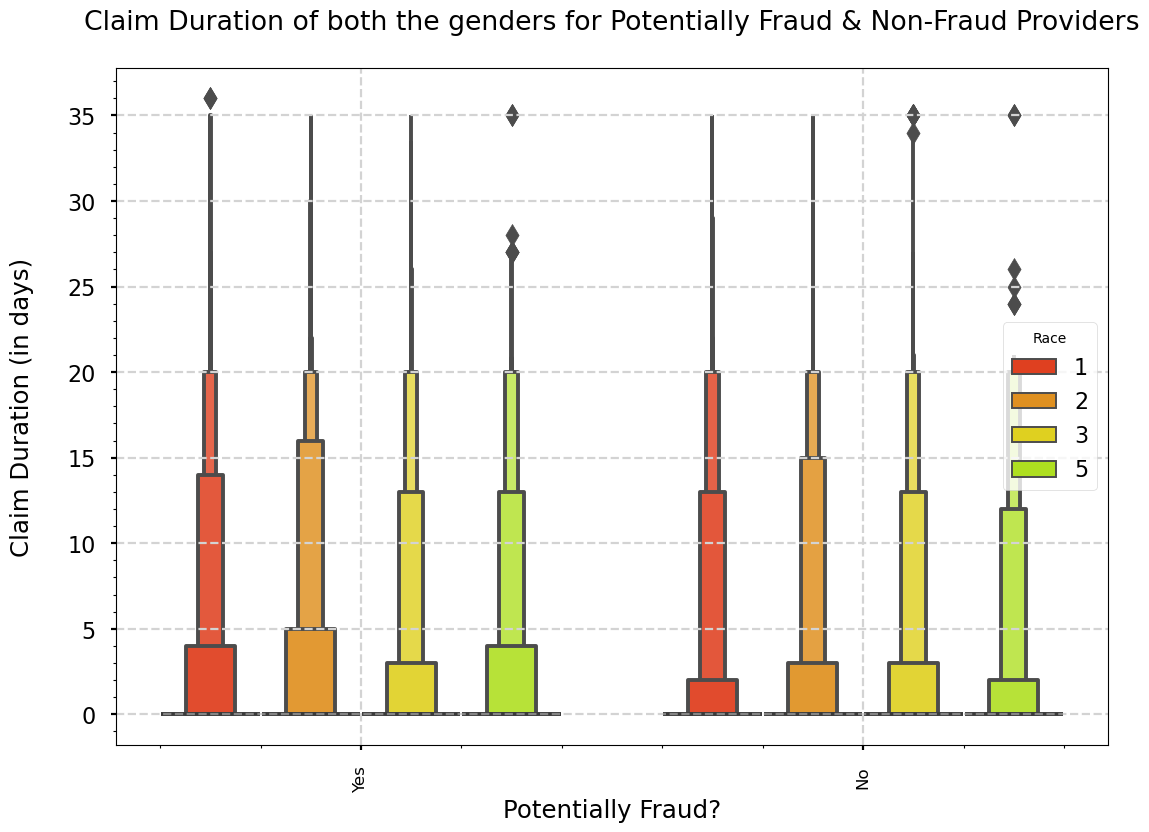

In [78]:

with plt.style.context('seaborn-poster'):
    fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='Claim_Duration', hue='Race', palette='prism')      
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration of both the genders for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

OBSERVATION

The above plot clearly shows us that there is no difference in the distribution of Claim Duration of patients with or w/o RKD for Potentially Fraud and Non-Fraud Providers.
Therefore, we can say that Claim Duration might not be useful in segregating the Fraud cases.

#### Adding New Feature :: Admitted_Duration
- Admitted Duration = Discharge Date - Admission Date

In [79]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

In [80]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

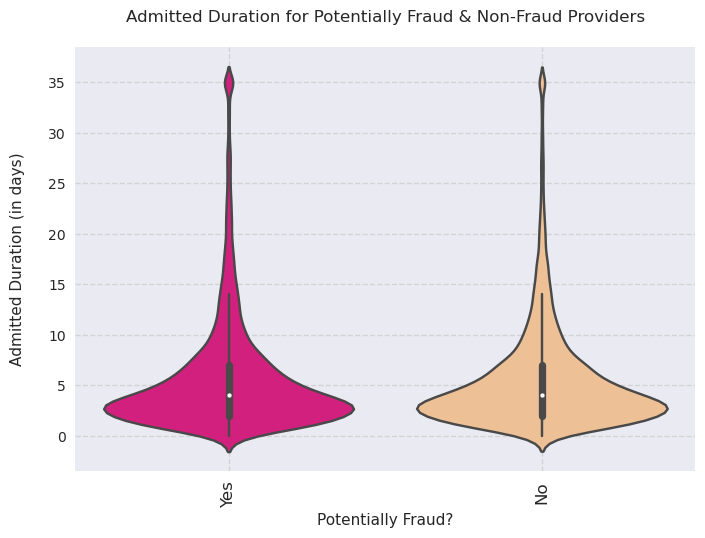

In [81]:
with plt.style.context('seaborn'):
    fig = sns.violinplot(data=train_iobp_df, x='PotentialFraud',y='Admitted_Duration', palette='Accent_r')   
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Admitted Duration (in days)\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Admitted Duration for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

#### Adding New Feature :: Bene_Age
- Bene Age = DOD - DOB (if DOD is Null then replace it with MAX date in DOD)

In [82]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD']=pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")
train_iobp_df['DOB']=pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")

In [83]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

Does IPAnnualReimbursementAmt influences Potentially Fraud?
Relationship b/w IPAnnualReimbursementAmt and Potentially Fraud

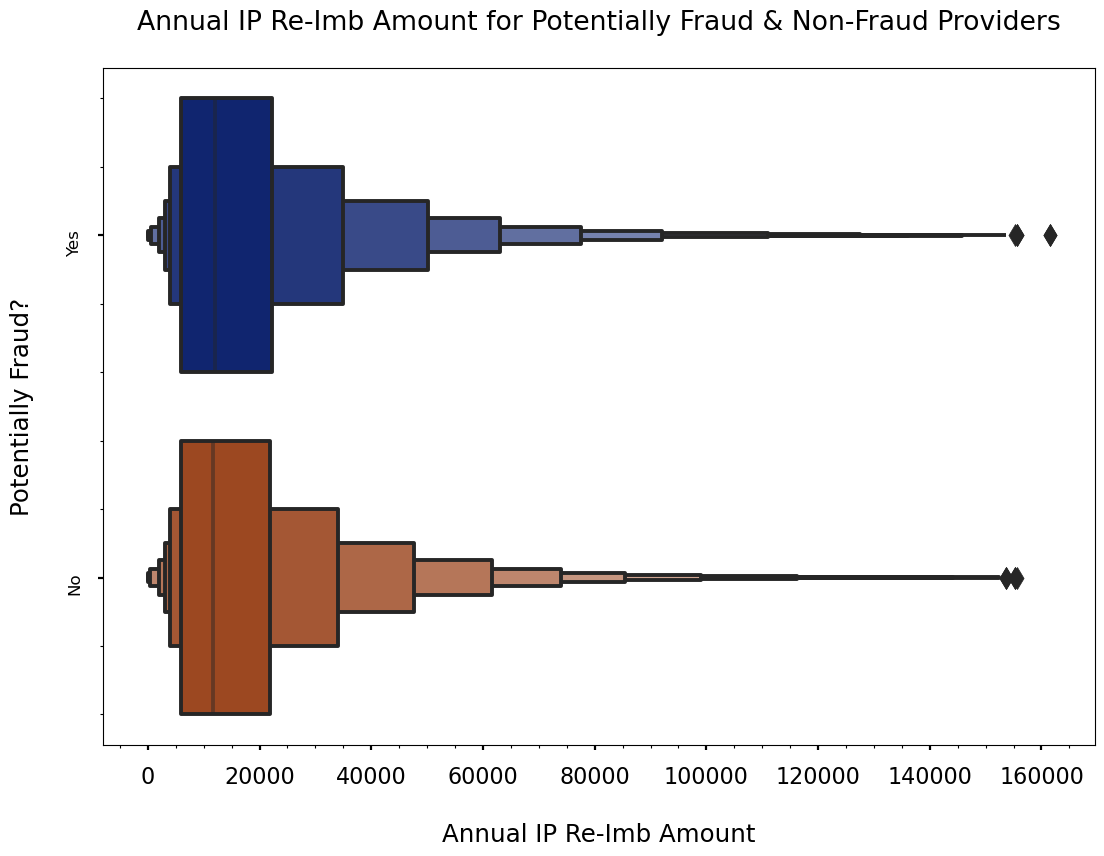

In [84]:
with plt.style.context('seaborn-poster'):
    fig = sns.boxenplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 1], y='PotentialFraud',x='IPAnnualReimbursementAmt', 
                         palette='dark', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n")
    plt.yticks(rotation=90, fontsize=12)
    plt.xlabel("\nAnnual IP Re-Imb Amount")
    plt.minorticks_on()
    plt.title("Annual IP Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();

OBSERVATION

The above plot clearly shows us that there is no difference in the distribution of Annual IP Re-Imb Amount for Potentially Fraud and Non-Fraud Providers.
And, it looks like a Pareto Distribution.

##### Why do we have IP Annual Re-Imb Amount as 0 for Admitted Patients?

In [85]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

   Admitted?
0     371263
1        413


So, we have 413 claims where Patients were admitted to the hospital but the allocated IP Annual Re-Imb Amt is 0.

In [86]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['IPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 1)]\
                   ['PotentialFraud'].value_counts()))

     PotentialFraud
Yes             249
No              164


So, out 413 claims 60% of them means 249 are fraudulent whereas 164 are non-fraudulent.`

OBSERVATION

Thus, we can say that if the IP Annual Amount is 0 and patient was admitted to the hospital then chances of being fraudulent are high.


Does OPAnnualReimbursementAmt influences Potentially Fraud?
Relationship b/w OPAnnualReimbursementAmt and Potentially Fraud

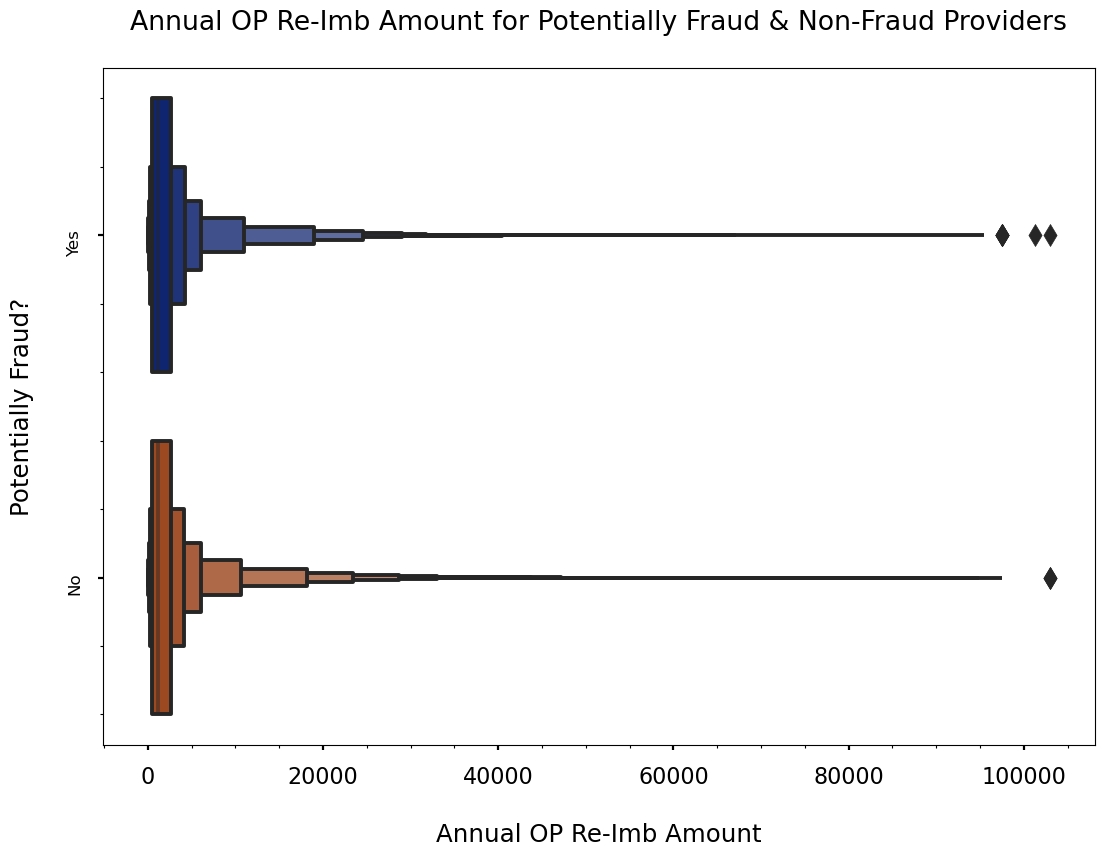

In [87]:
with plt.style.context('seaborn-poster'):
    fig = sns.boxenplot(data=train_iobp_df[train_iobp_df['Admitted?'] == 0], y='PotentialFraud', x='OPAnnualReimbursementAmt', 
                         palette='dark', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n")
    plt.yticks(rotation=90, fontsize=12)
    plt.xlabel("\nAnnual OP Re-Imb Amount")
    plt.minorticks_on()
    plt.title("Annual OP Re-Imb Amount for Potentially Fraud & Non-Fraud Providers\n")
    plt.plot();


OBSERVATION

The above plot clearly shows us that there is no difference in the distribution of Annual OP Re-Imb Amount for Potentially Fraud and Non-Fraud Providers.
And, it looks like a Pareto Distribution.

#### Why do we have OP Annual Re-Imb Amount as 0 for Admitted Patients?

In [88]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0)]['Admitted?'].value_counts()))

   Admitted?
1       3909
0       1009


So, we have 1009 claims where Patients were not admitted to the hospital but the allocated OP Annual Re-Imb Amt is 0.

In [89]:
print(pd.DataFrame(train_iobp_df[(train_iobp_df['OPAnnualReimbursementAmt'] == 0) & (train_iobp_df['Admitted?'] == 0)]\
                   ['PotentialFraud'].value_counts()))

     PotentialFraud
No              617
Yes             392


So, out 1009 claims 38% of them means 392 are fraudulent whereas 62% or 617 are non-fraudulent.

OBSERVATION

Thus, we can say that if the OP Annual Amount is 0 and patient was not admitted to the hospital then chances of being fraudulent are less.

REASONING

The idea behind adding this feature is to introduce a way by which we can see how many fraud or non fraud claims been submitted by a provider.

Generally what has been observed in medicare frauds is that many small hospitals from rural places had been intentionally used for filing the false claims by giving them bribes or in desire of kickbacks. Thus, for such providers total claims submitted will be less but majority of them will be false.

But, the problem in the given dataset after joining(IP, OP, BENE with PRV TGT) is that

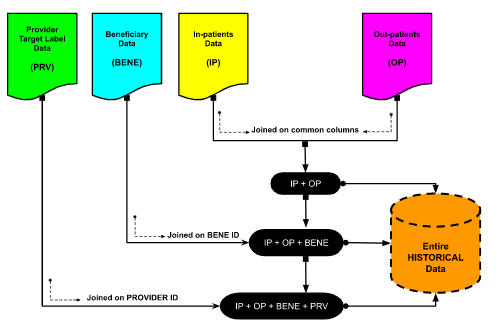

In [90]:
from IPython.display import Image
Image("Entire_train_dataset.png")

if a provider was FRAUD then all the claims associated to it will be marked as FRAUD which I believe is wrong and doesn't provide any useful information.

#### Adding New Feature :: Total Number of claims or cases seen by Attending Physician

In [91]:
# Total unique number of Attended Physicians
print("Unique number of Attending Physicians present in the dataset are --> {}".format(train_iobp_df['AttendingPhysician'].nunique()))

train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

Unique number of Attending Physicians present in the dataset are --> 82063


count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

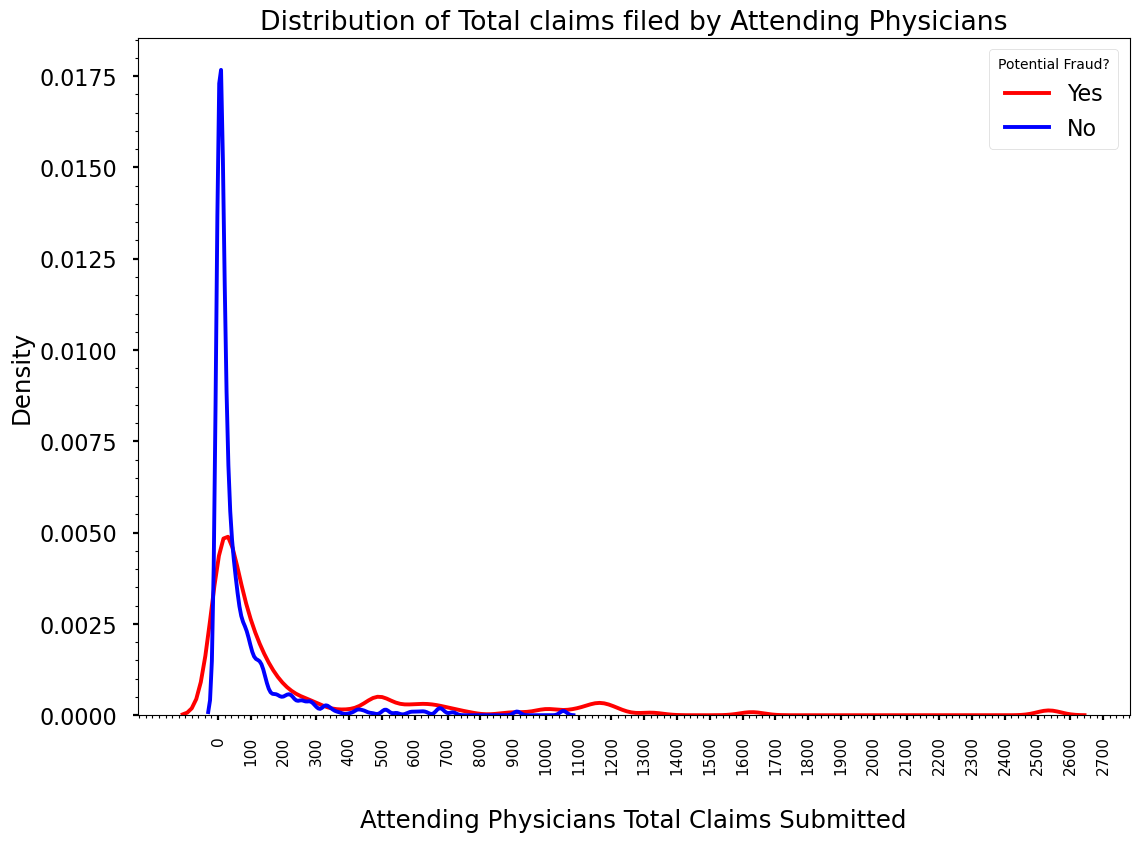

In [92]:
with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Att_Phy_tot_claims'],color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Att_Phy_tot_claims'],color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("\nAttending Physicians Total Claims Submitted")
    plt.xticks(np.arange(0,2800,100), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Total claims filed by Attending Physicians")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

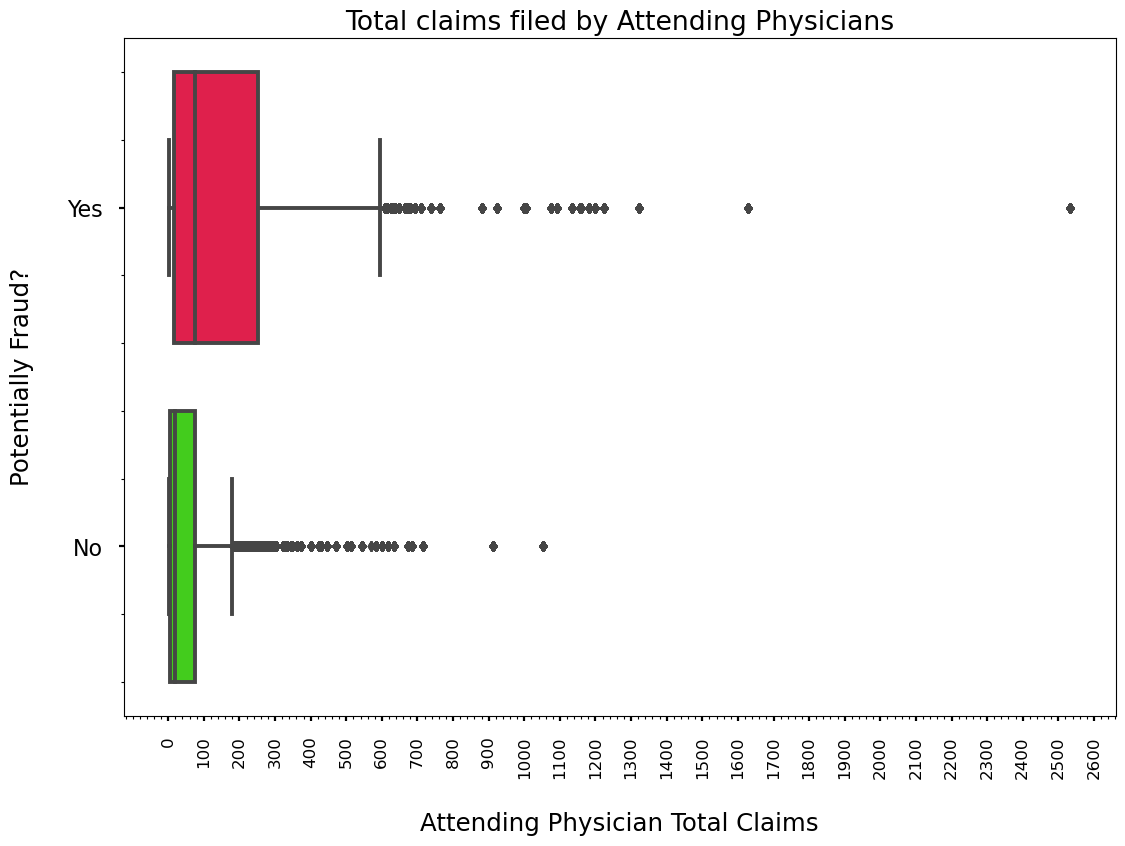

In [93]:

with plt.style.context('seaborn-poster'):
    fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Att_Phy_tot_claims', palette='prism_r', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n")
    plt.xticks(np.arange(0,2800,100), rotation=90, fontsize=12)
    plt.xlabel("\nAttending Physician Total Claims")
    plt.minorticks_on()
    plt.title("Total claims filed by Attending Physicians")
    plt.plot();

OBSERVATION

The above KDE and Box plots suggests that the newly added feature Att_Phy_tot_claims may be useful in segregating the potentially fraud and non-fraudulent cases.
For example, we can say that if total claims filed by a Attending Physician is greater than 500 then chances of being fraudulent are high.

Adding New Feature :: Total Number of claims or cases seen by Opearting Physician

In [94]:
# Total unique number of Operating Physicians
print("Unique number of Operating Physicians present in the dataset are --> {}".format(train_iobp_df['OperatingPhysician'].nunique()))

train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

Unique number of Operating Physicians present in the dataset are --> 35315


count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

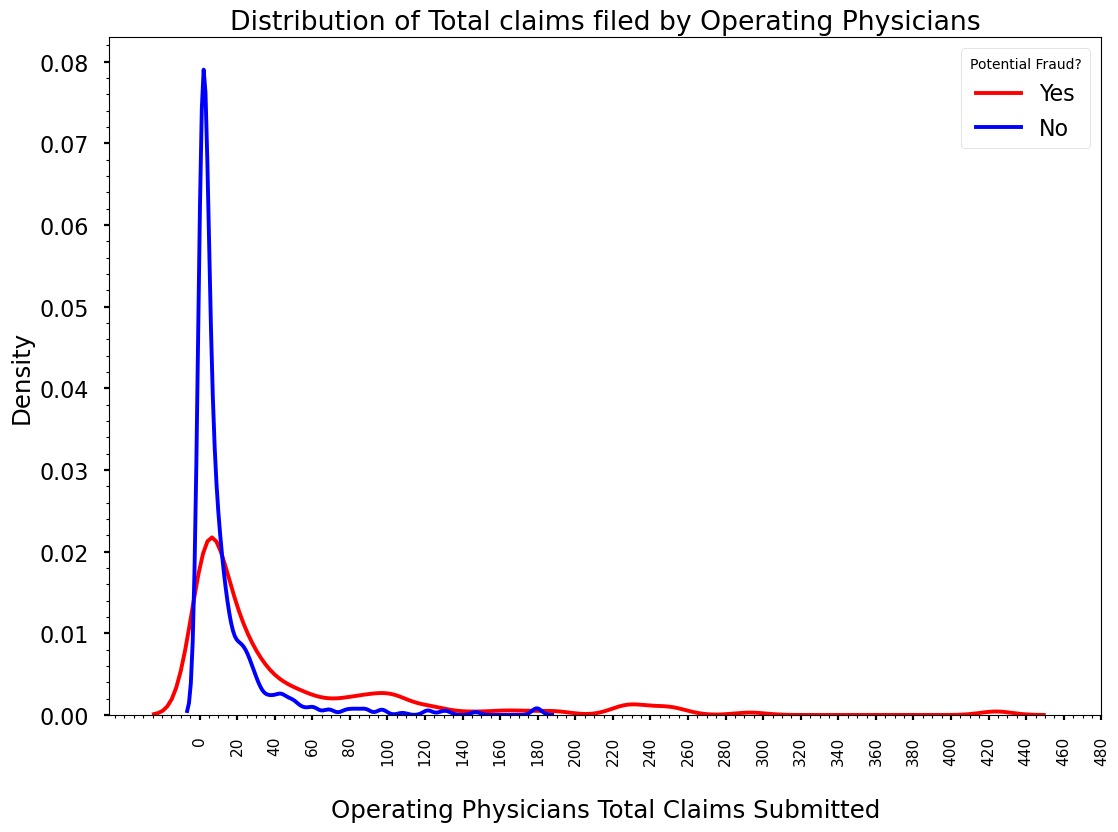

In [95]:
with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Opr_Phy_tot_claims'],color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Opr_Phy_tot_claims'],color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("\nOperating Physicians Total Claims Submitted")
    plt.xticks(np.arange(0,500,20), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Total claims filed by Operating Physicians")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");


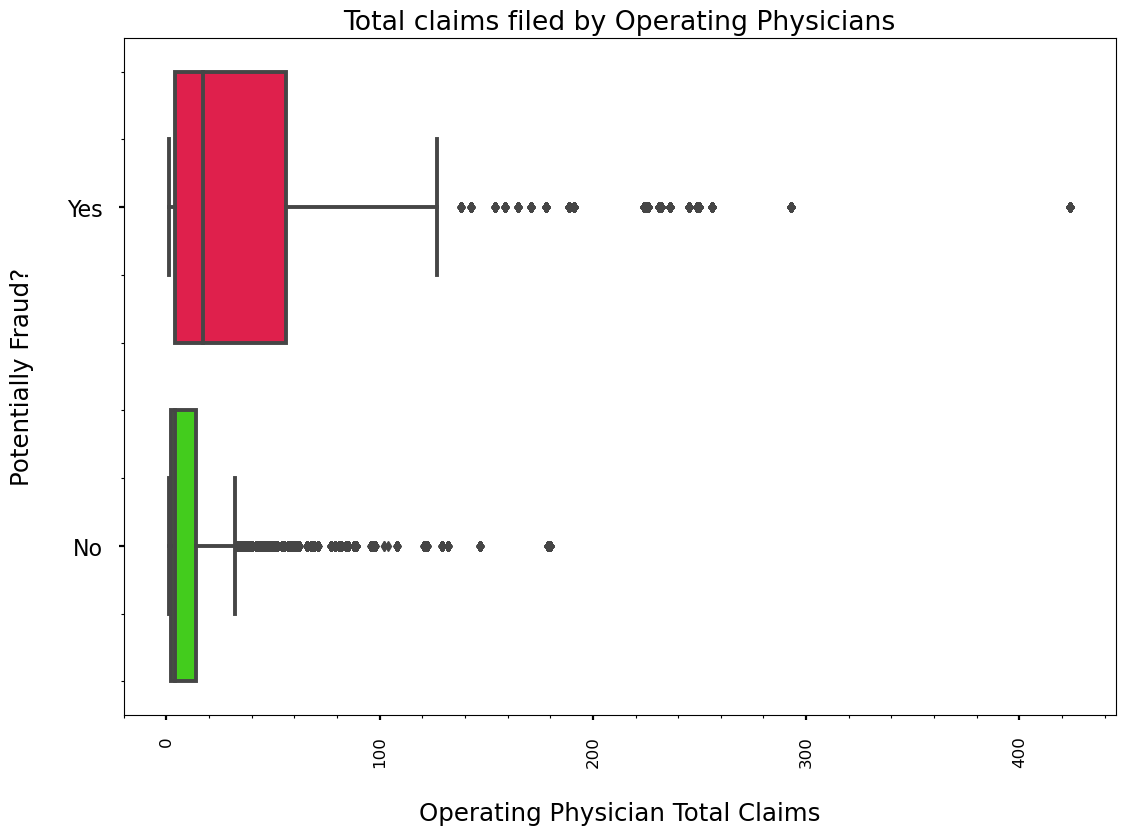

In [96]:

with plt.style.context('seaborn-poster'):
    fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Opr_Phy_tot_claims', palette='prism_r', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n")
    plt.xticks(np.arange(0,2800,100), rotation=90, fontsize=12)
    plt.xlabel("\nOperating Physician Total Claims")
    plt.minorticks_on()
    plt.title("Total claims filed by Operating Physicians")
    plt.plot();

OBSERVATION

The above KDE and Box plots suggests that the newly added feature Opr_Phy_tot_claims may be useful in segregating the potentially fraud and non-fraudulent cases.
Results are very similar to Att_Phy_tot_claims.
For example, we can say that if total claims filed by a Operating Physician are greater than 100 then chances of being fraudulent are high.

#### Adding New Feature :: Total Number of claims or cases seen by Other Physician

In [97]:
# Total unique number of Other Physicians
print("Unique number of Other Physicians present in the dataset are --> {}".format(train_iobp_df['OtherPhysician'].nunique()))

train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

Unique number of Other Physicians present in the dataset are --> 46457


count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

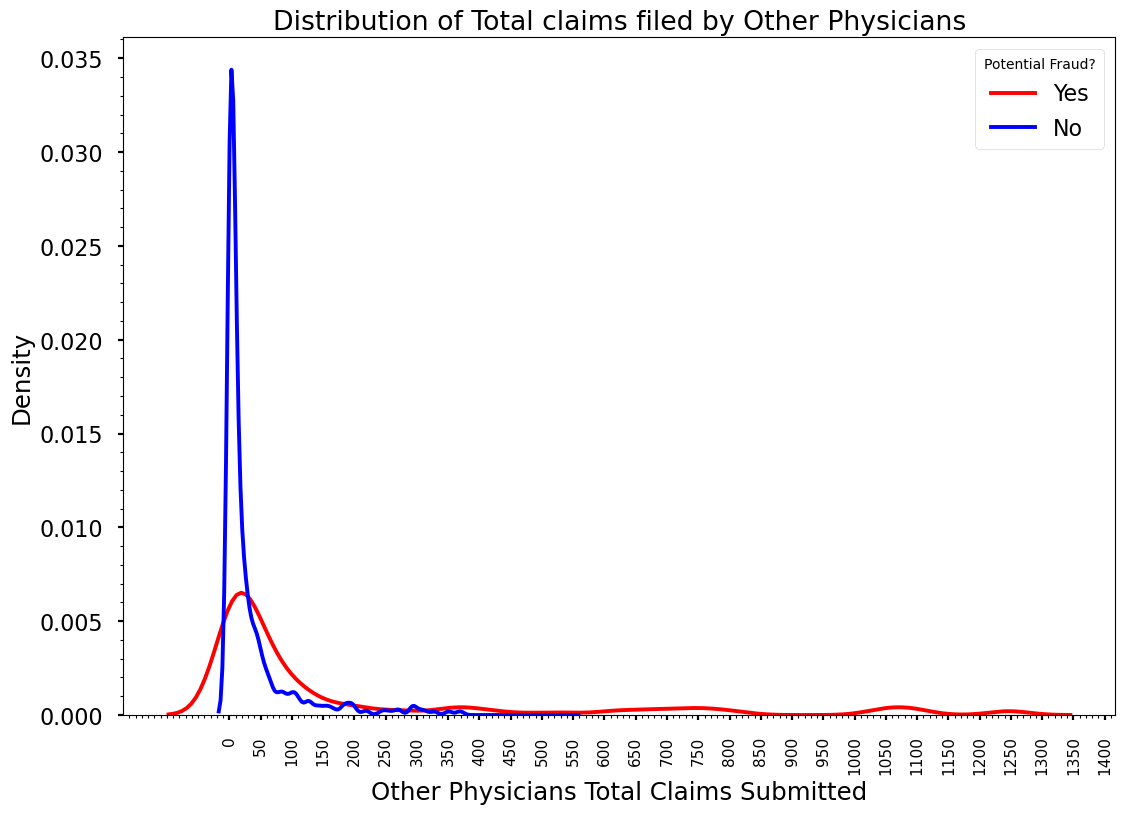

In [98]:
with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Oth_Phy_tot_claims'],color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Oth_Phy_tot_claims'],color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("Other Physicians Total Claims Submitted")
    plt.xticks(np.arange(0,1450,50), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Total claims filed by Other Physicians")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

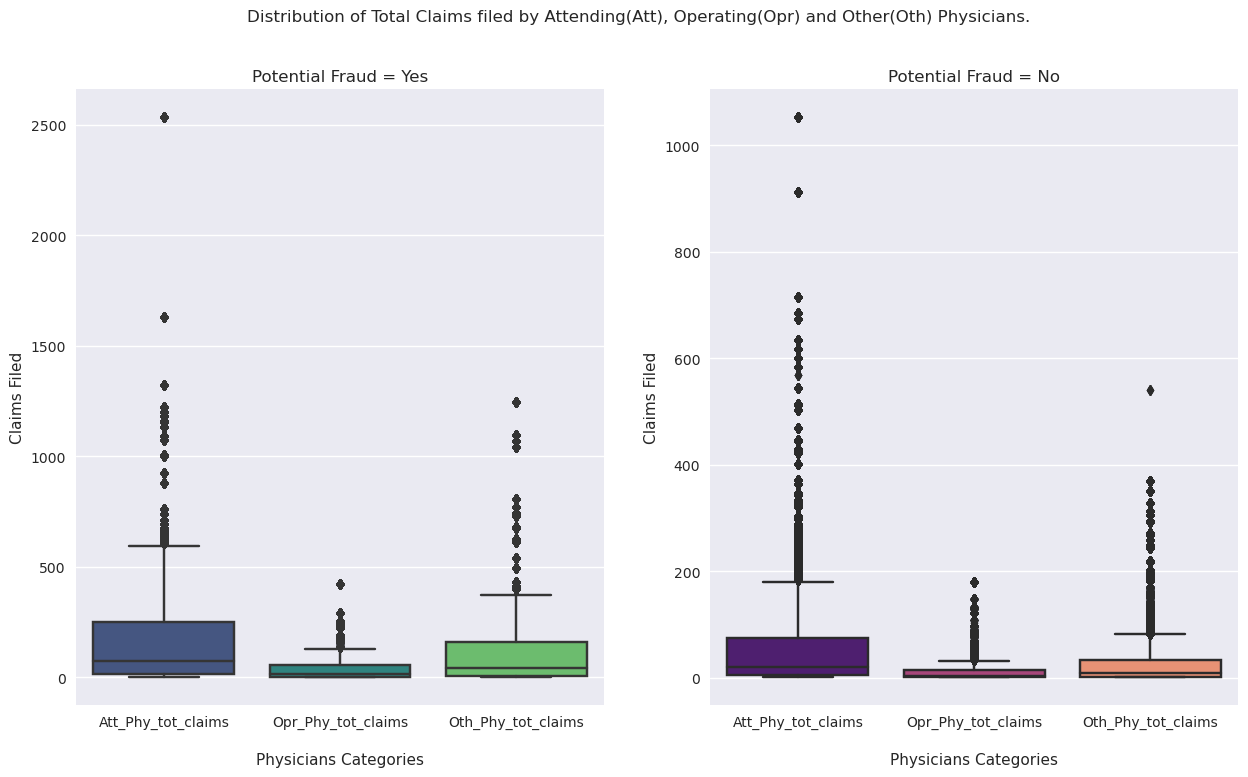

In [99]:
# Simultaneously viewing the plots for better understanding
with plt.style.context('seaborn'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharey=False)
    sns.boxplot(data=train_iobp_df[train_iobp_df["PotentialFraud"] == 'Yes'][['Att_Phy_tot_claims','Opr_Phy_tot_claims','Oth_Phy_tot_claims']],
                ax=ax1, palette='viridis')
    ax1.set_title("Potential Fraud = Yes")
    ax1.set_xlabel("\nPhysicians Categories")
    ax1.set_ylabel("Claims Filed")
    
    sns.boxplot(data=train_iobp_df[train_iobp_df["PotentialFraud"] == 'No'][['Att_Phy_tot_claims','Opr_Phy_tot_claims','Oth_Phy_tot_claims']],
                ax=ax2, palette='magma')
    ax2.set_title("Potential Fraud = No")
    ax2.set_xlabel("\nPhysicians Categories")
    ax2.set_ylabel("Claims Filed")
    # Providing the title to the figure
    fig.suptitle("Distribution of Total Claims filed by Attending(Att), Operating(Opr) and Other(Oth) Physicians.\n")
    plt.minorticks_on()
    plt.plot();  

OBSERVATION

The above Box plots suggests that theses newly added features may be slightly useful in segregating the potentially fraud and non-fraudulent cases.
As we can see that the total false claims filed by physicians are slightly more than the non-false claims filed by them.

Adding Combined Feature :: Att_Opr_Oth_Phy_Tot_Claims
It represents the total claims submitted by Attending, Operating and Other Physicians.

Reasoning :: The idea behind adding this feature is to see whether a total of physicians claims submission will help in influencing the potential frauds.

Logic :: Att_Phy_tot_claims + Opr_Phy_tot_claims + Oth_Phy_tot_claims

In [100]:
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

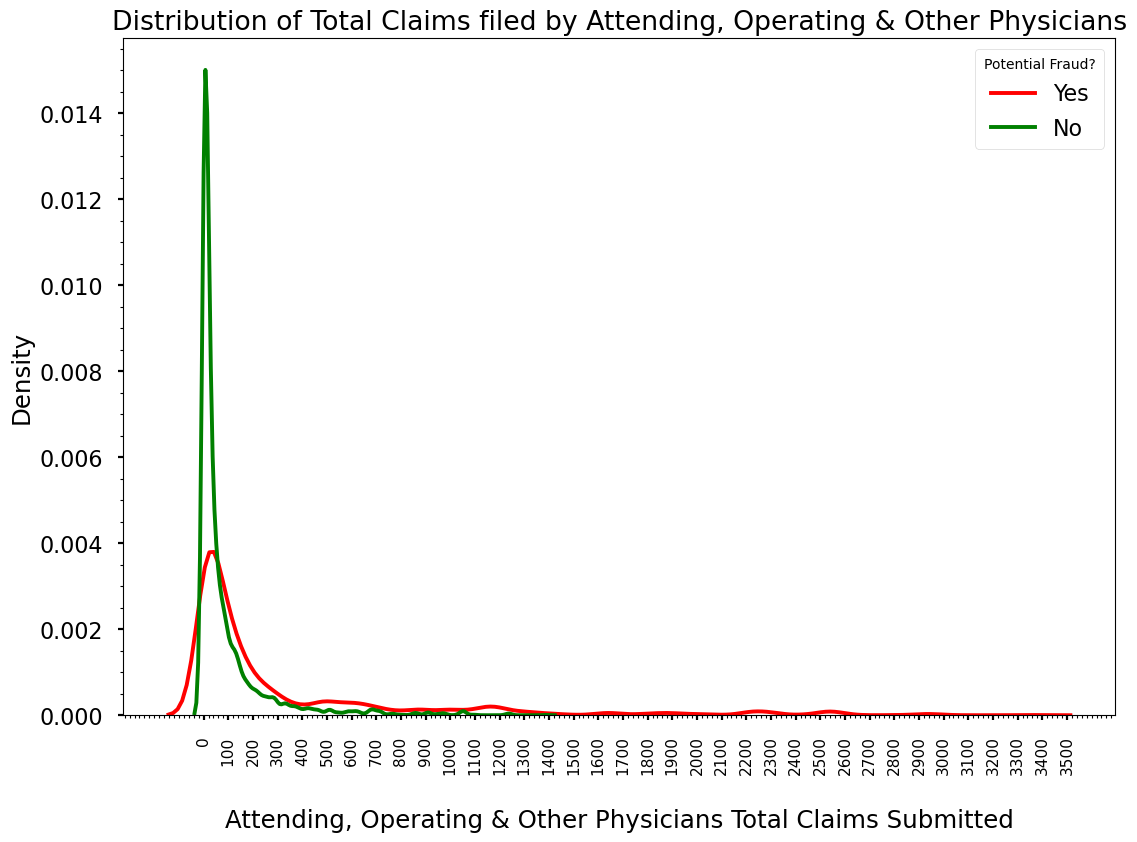

In [101]:

with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Att_Opr_Oth_Phy_Tot_Claims'],color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Att_Opr_Oth_Phy_Tot_Claims'],color='green')
    # Providing the labels and title to the graph
    plt.xlabel("\nAttending, Operating & Other Physicians Total Claims Submitted")
    plt.xticks(np.arange(0,3600,100), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Total Claims filed by Attending, Operating & Other Physicians")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

Adding 3 New Features :: Prv_Tot_Att_Phy, Prv_Tot_Opr_Phy and Prv_Tot_Oth_Phy
These features will represent the total Attending, Operating and Other Physicians for every provider.
Reasoning :: The idea behind adding this feature is to see if a provider has wroked with very less or very high number of physicians then does that increases or decreases the chances of potential fraud.

In [102]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [105]:
# Nulls in the above features
train_iobp_df["Prv_Tot_Att_Phy"].describe()

count    558211.000000
mean        820.206469
std        1271.272090
min           1.000000
25%         122.000000
50%         359.000000
75%        1013.000000
max        8207.000000
Name: Prv_Tot_Att_Phy, dtype: float64

The average number of attending physicians for providers are 820.

Relationship b/w PROVIDER and ATTENDING PHYSICIAN

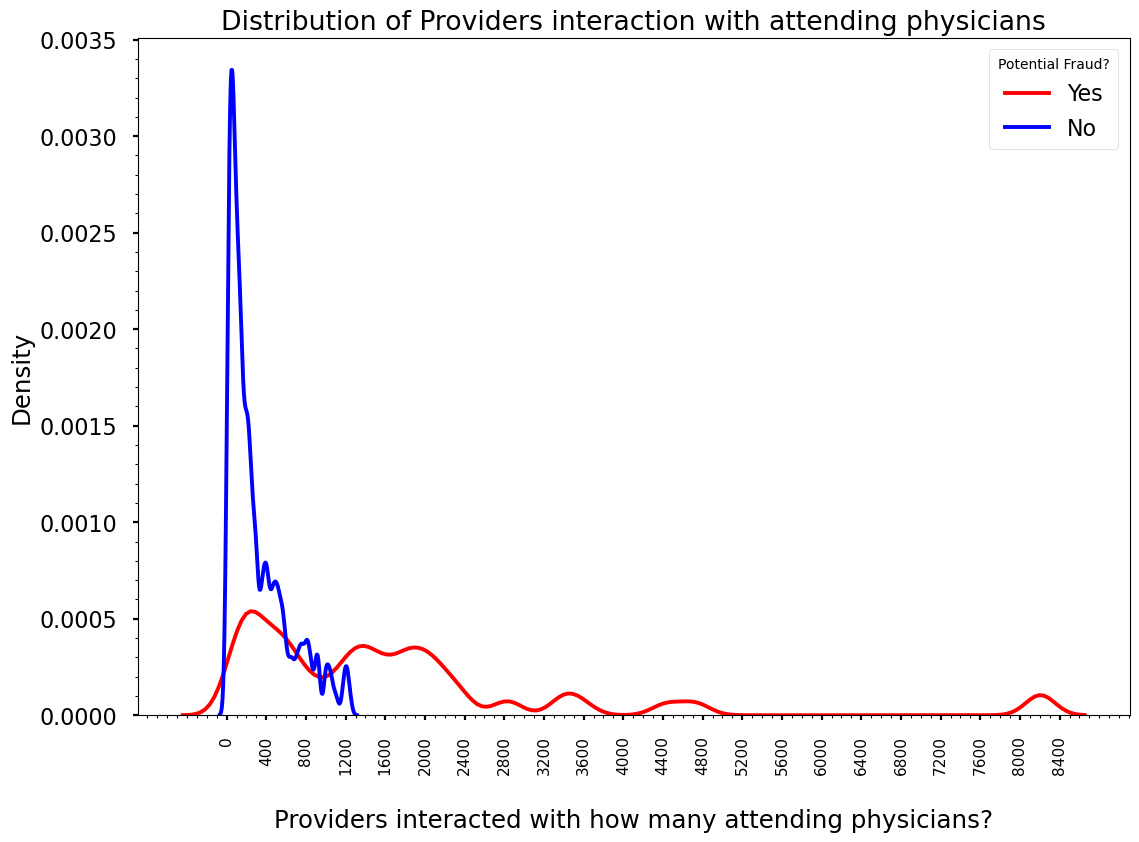

In [106]:
with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Att_Phy'],color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Att_Phy'],color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("\nProviders interacted with how many attending physicians?")
    plt.xticks(np.arange(0,8800,400), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Providers interaction with attending physicians")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

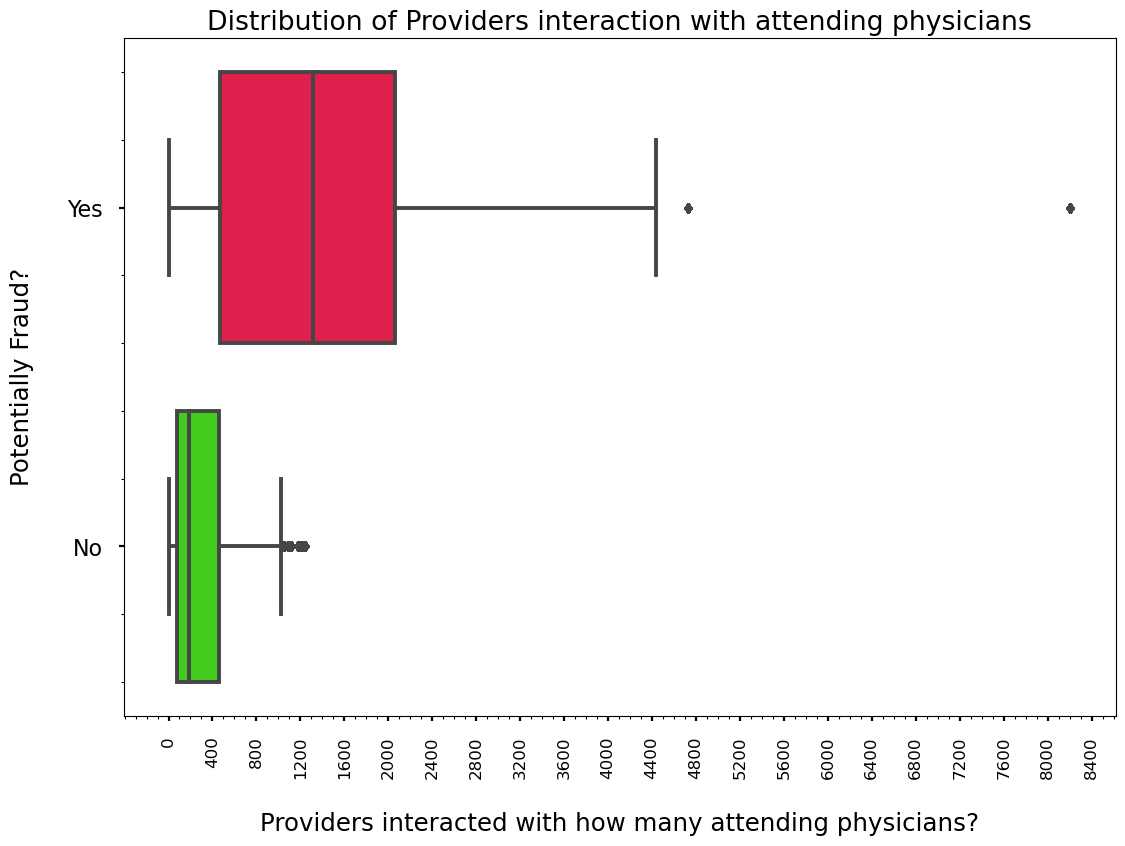

In [108]:
with plt.style.context('seaborn-poster'):
    fig = sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Att_Phy', palette='prism_r', orient='h')   
    # Providing the labels and title to the graph
    plt.ylabel("Potentially Fraud?\n")
    plt.xticks(np.arange(0,8800,400), rotation=90, fontsize=12)
    plt.xlabel("\nProviders interacted with how many attending physicians?")
    plt.minorticks_on()
    plt.title("Distribution of Providers interaction with attending physicians")
    plt.plot();

OBSERVATION

The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Att_Phy is high then chances of fraud is quite high.

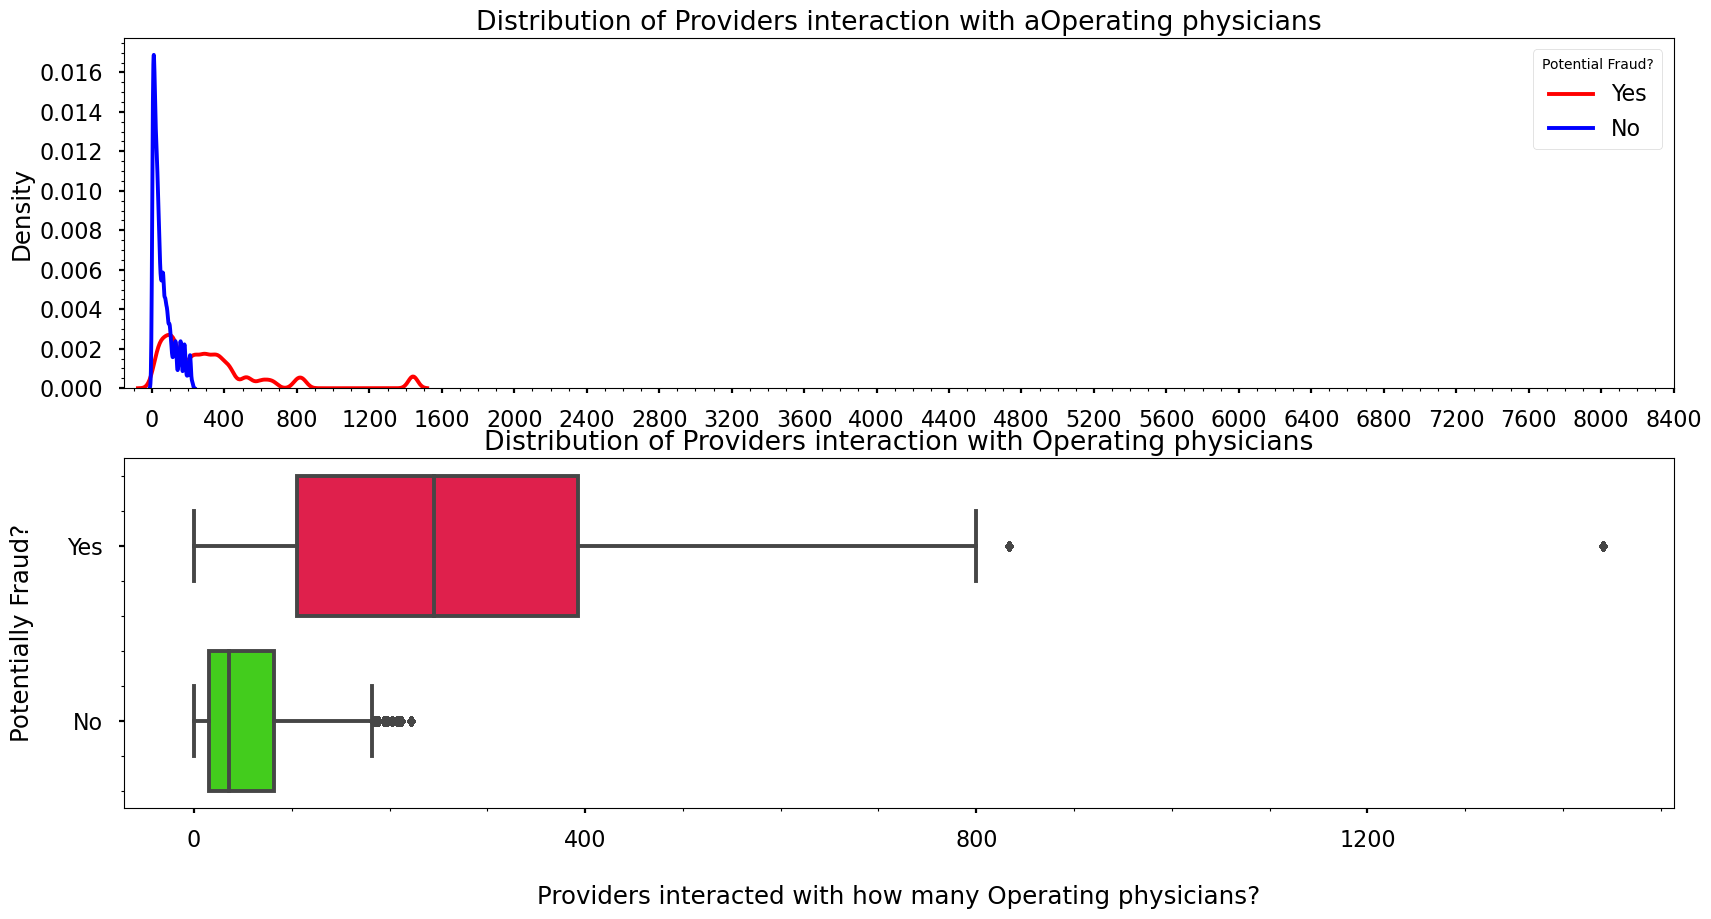

In [115]:
with plt.style.context('seaborn-poster'):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharey=False)
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['Prv_Tot_Opr_Phy'],color='red',ax=ax1)
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['Prv_Tot_Opr_Phy'],color='blue',ax=ax1)
    # Providing the labels and title to the graph
    ax1.set_xlabel("\nProviders interacted with how many Operating physicians?")
    ax1.set_xticks(np.arange(0,8800,400), rotation=90, fontsize=11)
    ax1.minorticks_on()
    ax1.set_title("Distribution of Providers interaction with aOperating physicians")
    ax1.legend(labels=["Yes", "No"], title="Potential Fraud?");
    
# with plt.style.context('seaborn-poster'):
    sns.boxplot(data=train_iobp_df, y='PotentialFraud', x='Prv_Tot_Opr_Phy', palette='prism_r', orient='h',ax=ax2)   
    # Providing the labels and title to the graph
    ax2.set_ylabel("Potentially Fraud?\n")
    ax2.set_xticks(np.arange(0,8800,400), rotation=90, fontsize=12)
    ax2.set_xlabel("\nProviders interacted with how many Operating physicians?")
    ax2.minorticks_on()
    ax2.set_title("Distribution of Providers interaction with Operating physicians")
    ax2.plot();
    
    
#     sns.boxplot(data=train_iobp_df[train_iobp_df["PotentialFraud"] == 'Yes'][['Att_Phy_tot_claims','Opr_Phy_tot_claims','Oth_Phy_tot_claims']],
#                 ax=ax1, palette='viridis')
#     ax1.set_title("Potential Fraud = Yes")
#     ax1.set_xlabel("\nPhysicians Categories")
#     ax1.set_ylabel("Claims Filed")
    
#     sns.boxplot(data=train_iobp_df[train_iobp_df["PotentialFraud"] == 'No'][['Att_Phy_tot_claims','Opr_Phy_tot_claims','Oth_Phy_tot_claims']],
#                 ax=ax2, palette='magma')
#     ax2.set_title("Potential Fraud = No")
#     ax2.set_xlabel("\nPhysicians Categories")
#     ax2.set_ylabel("Claims Filed")
#     # Providing the title to the figure
#     fig.suptitle("Distribution of Total Claims filed by Attending(Att), Operating(Opr) and Other(Oth) Physicians.\n")
#     plt.minorticks_on()
#     plt.plot();

OBSERVATION

The above KDE and Box plots are quite interesting as we can see that if Prv_Tot_Opr_Phy is high then chances of fraud is quite high.

#### Adding Combined Feature :: Prv_Tot_Att_Opr_Oth_Phys
It represents the total of all kind of physicians that a provider has interacted with.

Reasoning :: The idea behind adding this feature is to see whether a fraudulent provider interacts with higher or lower numberof of various physicians.
Logic :: Prv_Tot_Att_Phy + Prv_Tot_Opr_Phy + Prv_Tot_Oth_Phy

In [118]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [117]:
print(len(train_iobp_df['Prv_Tot_Att_Phy']))
print(len(train_iobp_df['Prv_Tot_Opr_Phy']))
print(len(train_iobp_df['Prv_Tot_Oth_Phy']))


558211
558211
558211


In [119]:
len(train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'])

558211

#### Adding New Feature :: Total Unique Claim Admit Codes used by a PROVIDER
Reasoning :: The idea behind adding this feature is to see how many unique number of Claim Admit Diagnosis Codes used by the Provider.
As there may be a pattern that if a provider has used so many Admit Diagnosis Codes then it might increases or decreases the chances of fraud.

In [120]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [122]:
train_iobp_df['PRV_Tot_Admit_DCodes'].value_counts()

582    8240
359    7024
17     6267
13     6152
25     6065
       ... 
125     436
116     434
128     421
94      366
85      151
Name: PRV_Tot_Admit_DCodes, Length: 207, dtype: int64

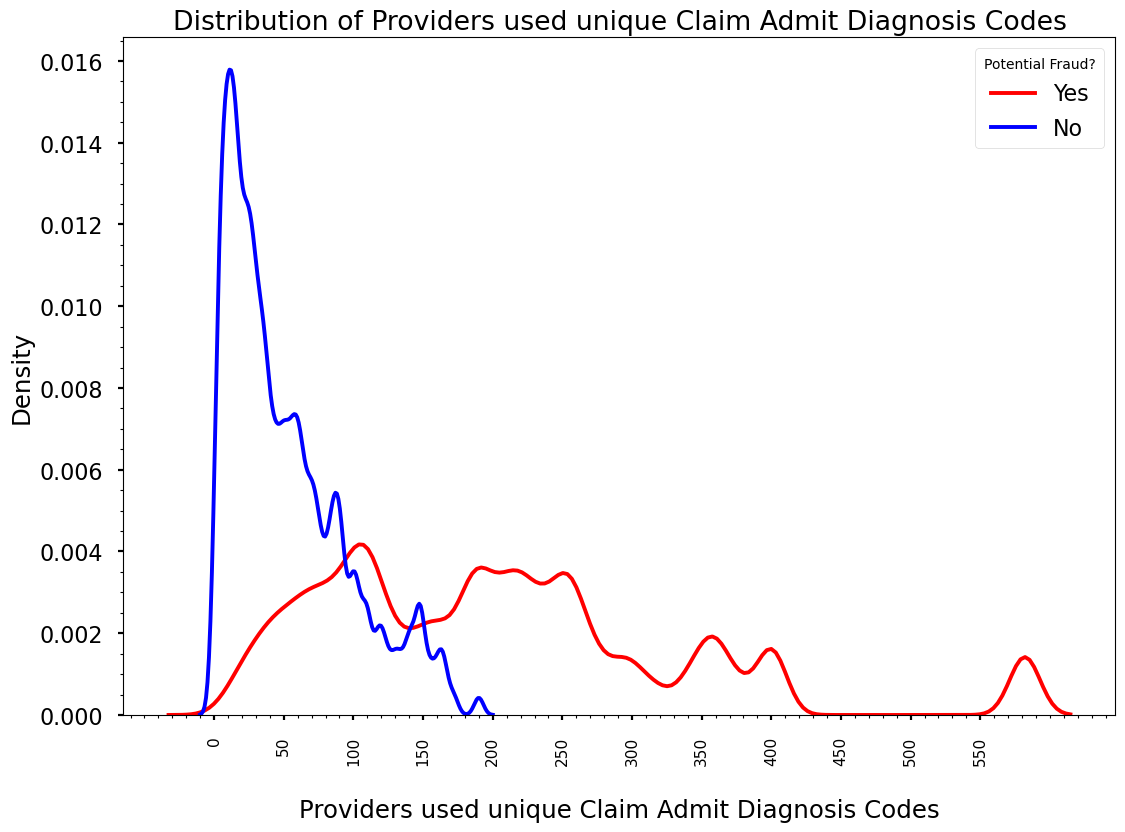

In [123]:
with plt.style.context('seaborn-poster'):
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'Yes']['PRV_Tot_Admit_DCodes'], color='red')
    sns.kdeplot(x=train_iobp_df[train_iobp_df['PotentialFraud'] == 'No']['PRV_Tot_Admit_DCodes'], color='blue')
    # Providing the labels and title to the graph
    plt.xlabel("\nProviders used unique Claim Admit Diagnosis Codes")
    plt.xticks(np.arange(0,600,50), rotation=90, fontsize=11)
    plt.minorticks_on()
    plt.title("Distribution of Providers used unique Claim Admit Diagnosis Codes")
    plt.legend(labels=["Yes", "No"], title="Potential Fraud?");

OBSERVATION

The above KDE plot is very interesting as we can see that if PRV_Tot_Admit_DCodes is high then chances of fraud also increases.
NOTE :: What didn't worked?

I also looked to add the unique number of Admit Diagnosis Codes used by the 3 different class of physicians but the variation was very minimal, thus not added those features.

Adding New Feature :: Total Unique Number of Diagnosis Group Codes used by a PROVIDER
Reasoning :: The idea behind adding this feature is to see how many unique Diagnosis Group Codes used by the Provider.
As there may be a pattern that if a provider has used so many Diagnosis Group Codes then it might increases or decreases the chances of fraud.

#### Some trends
Q1. Which are the Top-25 Providers with maximum number of fraudulent cases?

In [125]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,Provider,Fraud?,Num_of_cases,Cases,Percentage
0,PRV51001,No,25,345415,0.01
1,PRV51003,Yes,132,212796,0.06
2,PRV51004,No,149,345415,0.04
3,PRV51005,Yes,1165,212796,0.55
4,PRV51007,No,72,345415,0.02


In [126]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Provider  Num_of_cases  Percentage
0   PRV51459          8240        3.87
1   PRV53797          4739        2.23
2   PRV51574          4444        2.09
3   PRV53918          3588        1.69
4   PRV54895          3436        1.61
5   PRV55215          3393        1.59
6   PRV52064          2844        1.34
7   PRV56011          2833        1.33
8   PRV55004          2399        1.13
9   PRV56560          2313        1.09
10  PRV57306          2315        1.09
11  PRV52030          2275        1.07
12  PRV52649          2156        1.01
13  PRV54772          2115        0.99
14  PRV52628          2098        0.99
15  PRV51369          2083        0.98
16  PRV51347          2067        0.97
17  PRV55039          2058        0.97
18  PRV57103          2049        0.96
19  PRV52019          1961        0.92
20  PRV51480          1924        0.90
21  PRV55462          1907        0.90
22  PRV52041          1885        0.89
23  PRV55467          1896        0.89
24  PRV54742          189

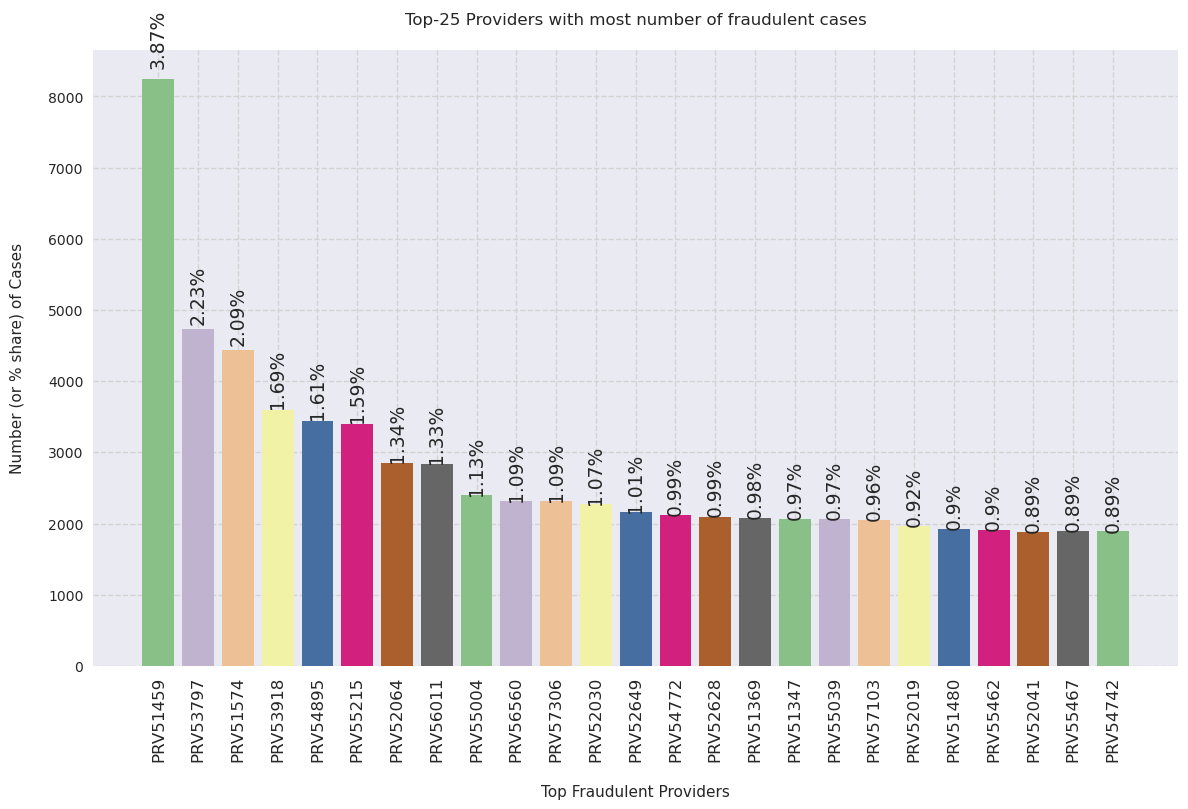

In [127]:
print(tmp_only_frauds[['Provider','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Providers with most number of fraudulent cases\n")
    plt.plot();

OBSERVATION

The above plot shows us the Top-25 Providers with most percentage of Fraudulent Case Submissions.
Here, PRV51459 has the highest percentage share of fraudulent cases. The, difference b/w others providers is not that high.

In [128]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Provider  Num_of_cases  Percentage
0   PRV53750          1245        0.36
1   PRV55552          1206        0.35
2   PRV53394          1215        0.35
3   PRV53871          1220        0.35
4   PRV52001          1177        0.34
5   PRV52104          1189        0.34
6   PRV56559          1113        0.32
7   PRV56006          1090        0.32
8   PRV54813          1056        0.31
9   PRV52631          1057        0.31
10  PRV51509          1030        0.30
11  PRV56270          1043        0.30
12  PRV54332           995        0.29
13  PRV52605          1000        0.29
14  PRV53702          1010        0.29
15  PRV57333          1004        0.29
16  PRV55525           933        0.27
17  PRV56248           934        0.27
18  PRV57348           920        0.27
19  PRV52395           912        0.26
20  PRV56243           909        0.26
21  PRV52859           911        0.26
22  PRV53700           913        0.26
23  PRV55510           861        0.25
24  PRV54374           85

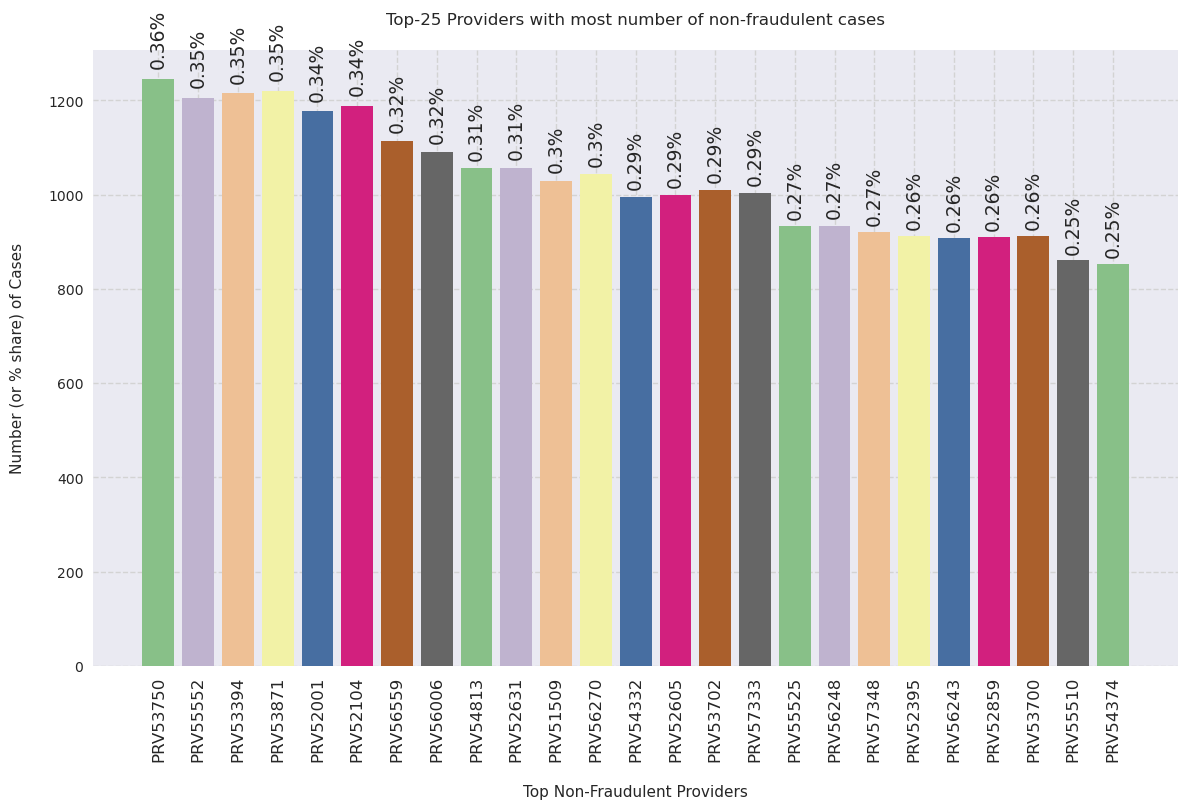

In [130]:
print(tmp_only_non_frauds[['Provider','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent Providers")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Providers with most number of non-fraudulent cases\n")
    plt.plot();

OBSERVATION

The above plot shows us the Top-25 Providers with most percentage of Non-Fraudulent Case Submissions.
Here, PRV53750 has the highest percentage share of non-fraudulent cases. But, the difference with other providers is not so high.

#### Q2. Which are the Top-25 ClmAdmitDiagnosisCode with maximum number of fraudulent cases?

In [131]:
tmp = pd.DataFrame(train_iobp_df.groupby(['ClmAdmitDiagnosisCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['ClmAdmitDiagnosisCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,ClmAdmitDiagnosisCode,Fraud?,Num_of_cases,Cases,Percentage
0,0030,No,1,83850,0.00
1,0030,Yes,1,62049,0.00
2,0059,No,1,83850,0.00
3,0059,Yes,2,62049,0.00
4,00845,No,31,83850,0.04


In [132]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
print(tmp_only_frauds[['ClmAdmitDiagnosisCode','Num_of_cases','Percentage']].head(25), "\n")

   ClmAdmitDiagnosisCode  Num_of_cases  Percentage
0                  42731          1529        2.46
1                  V7612          1441        2.32
2                  78605          1432        2.31
3                  78650          1191        1.92
4                  78900          1020        1.64
5                   4019          1006        1.62
6                  25000           873        1.41
7                    486           843        1.36
8                  78079           828        1.33
9                   7802           793        1.28
10                  7295           740        1.19
11                  5990           703        1.13
12                 V5883           691        1.11
13                  4280           661        1.07
14                  7242           600        0.97
15                  7862           593        0.96
16                 V5789           573        0.92
17                 V5861           556        0.90
18                  2724       

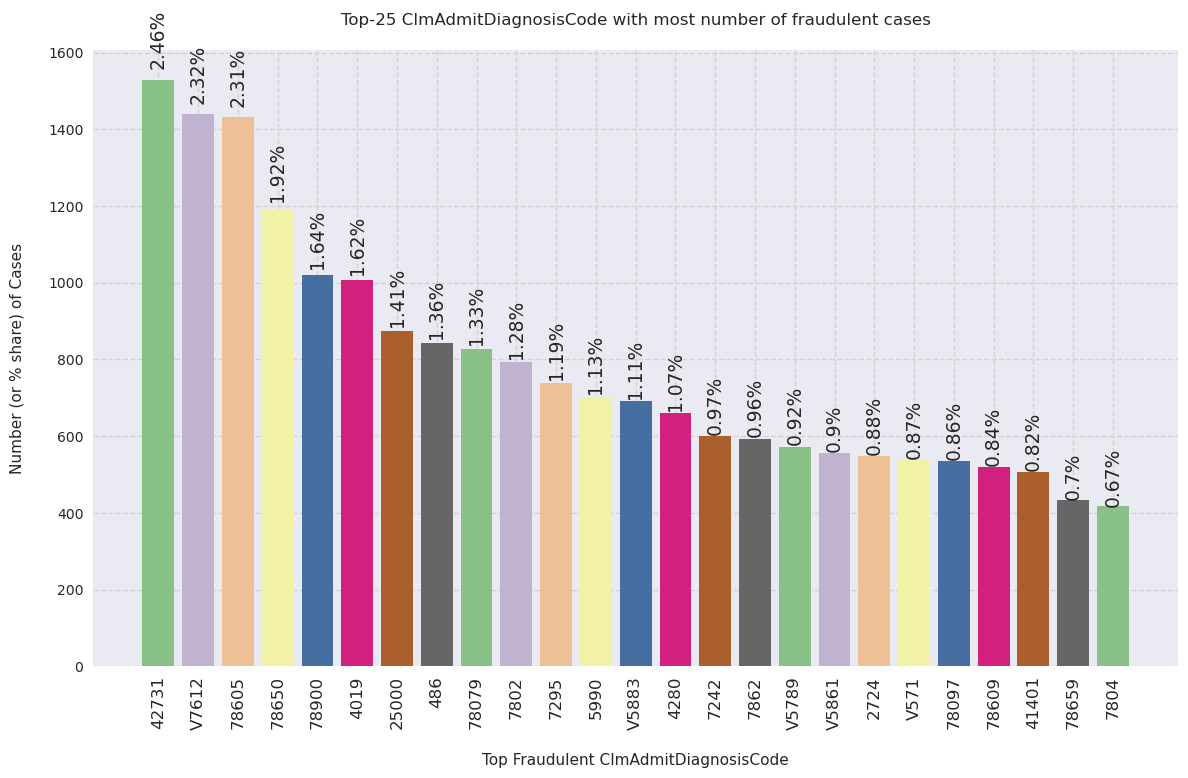

In [134]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="ClmAdmitDiagnosisCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent ClmAdmitDiagnosisCode")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 ClmAdmitDiagnosisCode with most number of fraudulent cases\n")
    plt.plot();

   ClmAdmitDiagnosisCode  Num_of_cases  Percentage
0                  V7612          2633        3.14
1                  42731          2105        2.51
2                   4019          1726        2.06
3                  78605          1560        1.86
4                  25000          1495        1.78
5                  78900          1316        1.57
6                  V5883          1182        1.41
7                   7295          1104        1.32
8                  78650          1082        1.29
9                   7242           997        1.19
10                 V5861           980        1.17
11                  2724           958        1.14
12                 78079           951        1.13
13                  5990           922        1.10
14                  V571           905        1.08
15                  7862           868        1.04
16                  7802           820        0.98
17                  4011           660        0.79
18                   486       

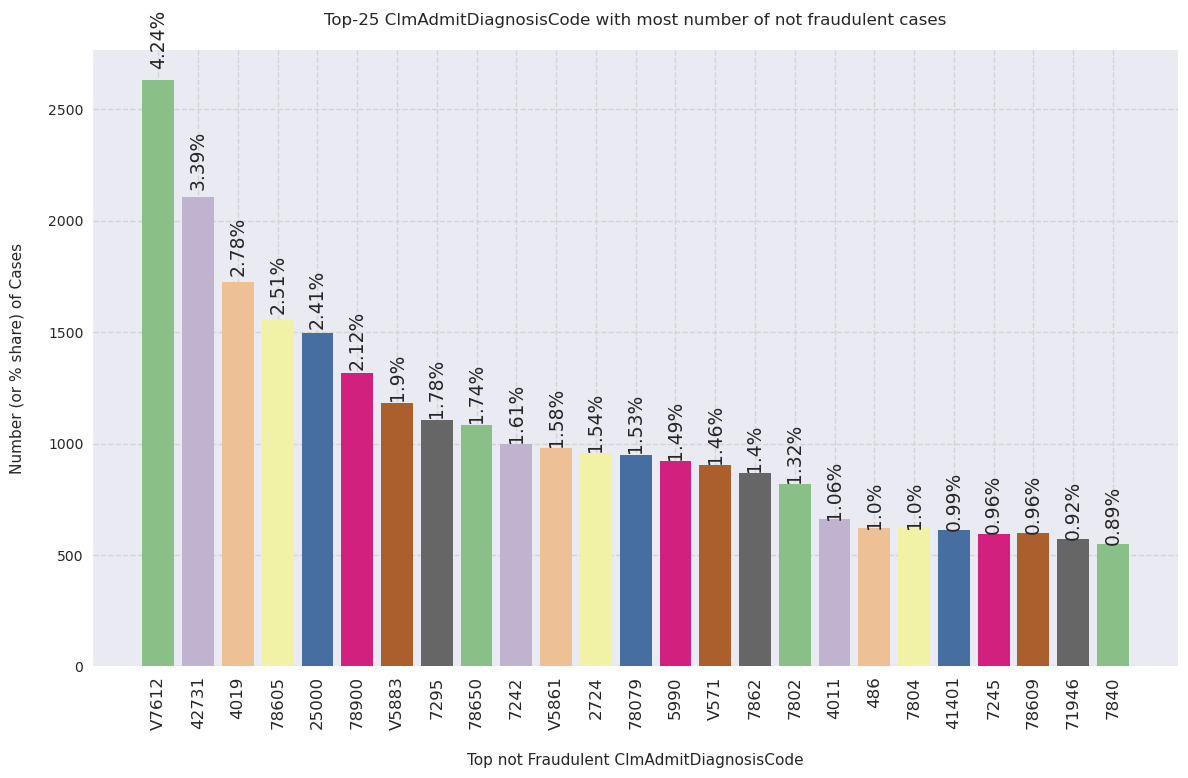

In [135]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)
print(tmp_only_frauds[['ClmAdmitDiagnosisCode','Num_of_cases','Percentage']].head(25), "\n")
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="ClmAdmitDiagnosisCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop not Fraudulent ClmAdmitDiagnosisCode")
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n")
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 ClmAdmitDiagnosisCode with most number of not fraudulent cases\n")
    plt.plot();

OBSERVATION

The above plot shows us the Top-25 'Claim Admit Diagnosis Code' with most percentage of Non-Fraudulent Case Submissions.

Main observation from the above 2 plots is that same Claim Admit Diagnostic Codes have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

# Feature Engg - SET 1

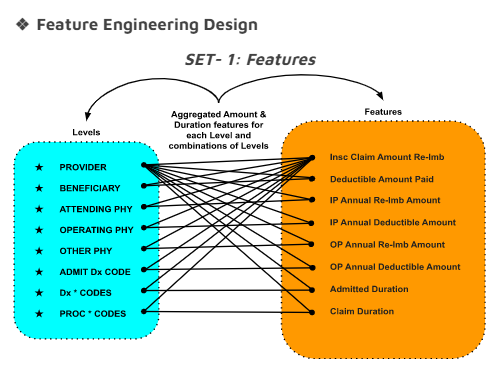

In [137]:
from IPython.display import Image
Image("feature_set1png.png")